In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import re
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

In [3]:
expidia_df = pd.read_csv('expediaHotelsClean.csv')
expidia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_usd,1866.0,966.969453,442.912397,142.0,661.0,985.0,1244.75,4407.0
is_breakfast_included,1866.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
rating,1866.0,8.720257,0.394040,8.0,8.4,8.8,9.00,9.2
verbal_rating,1866.0,3.106645,0.774866,2.0,2.0,3.0,4.00,4.0
review_count,1866.0,1713.088960,1132.850939,301.0,1012.0,1331.0,1773.00,4699.0
length_of_stay,1866.0,3.364952,1.368051,1.0,2.0,4.0,5.00,5.0
time_to_travel,1866.0,15.484459,8.807201,1.0,7.0,16.0,23.00,30.0
discount_presentage,1866.0,17.452840,8.794293,3.0,12.0,15.0,20.00,51.0
neighborhood_Brooklyn,1866.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
neighborhood_Central New York City,1866.0,0.022508,0.148369,0.0,0.0,0.0,0.00,1.0


In [4]:
booking_df = pd.read_csv('bookingHotelsClean.csv')
booking_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
price_usd,25108.0,910.032340,502.823965,105.0,512.0,863.0,1239.0,5319.0
price_before_discount_usd,4773.0,1242.498010,624.135605,122.0,845.0,1202.0,1567.0,6644.0
bed_types,22819.0,3.462728,0.700320,1.0,3.0,4.0,4.0,4.0
distance_to_center,25108.0,3.277282,1.281776,1.0,3.0,4.0,4.0,5.0
stars,24803.0,3.823489,0.551633,1.0,3.0,4.0,4.0,5.0
rating,25013.0,8.040279,0.541096,1.0,7.8,8.1,8.4,10.0
verbal_rating,24624.0,1.795850,0.732475,1.0,1.0,2.0,2.0,4.0
location_rating,9480.0,9.434641,0.116352,9.3,9.3,9.4,9.5,10.0
cleanliness_rating,4939.0,8.975197,0.216161,8.4,8.8,9.0,9.1,9.7
review_count,25013.0,3254.301043,3677.984543,1.0,1093.0,1971.0,3946.0,22402.0


In [5]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                1866 non-null   object 
 1   city                                1866 non-null   object 
 2   price_usd                           1866 non-null   float64
 3   is_breakfast_included               1866 non-null   int64  
 4   rating                              1866 non-null   float64
 5   verbal_rating                       1866 non-null   float64
 6   review_count                        1866 non-null   int64  
 7   snapshot_date                       1866 non-null   object 
 8   length_of_stay                      1866 non-null   int64  
 9   time_to_travel                      1866 non-null   int64  
 10  check_in_date                       1866 non-null   object 
 11  check_out_date                      1866 no

In [6]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       25108 non-null  object 
 1   city                       25108 non-null  object 
 2   neighborhood               25108 non-null  object 
 3   price_usd                  25108 non-null  float64
 4   price_before_discount_usd  4773 non-null   float64
 5   room_type                  25102 non-null  object 
 6   bed_types                  22819 non-null  float64
 7   distance_to_center         25108 non-null  int64  
 8   is_cancellation_free       11611 non-null  object 
 9   is_prepayment_required     6602 non-null   object 
 10  is_breakfast_included      4730 non-null   object 
 11  stars                      24803 non-null  float64
 12  rating                     25013 non-null  float64
 13  verbal_rating              24624 non-null  flo

In [7]:
# Filling the missing values with False

booking_df['is_cancellation_free'].fillna(False, inplace=True)

# Converting the values in the is_cancellation_free column from True and False to 1 and 0

booking_df['is_cancellation_free'] = booking_df['is_cancellation_free'].astype(int)
booking_df['is_breakfast_included'] = booking_df['is_breakfast_included'].fillna(False).astype(int)
booking_df['is_prepayment_required'] = booking_df['is_prepayment_required'].fillna(True).astype(int)


In [8]:
print(booking_df['is_cancellation_free'].head())


0    0
1    0
2    0
3    0
4    0
Name: is_cancellation_free, dtype: int32


In [9]:


# בדיקת התוצאה
print(booking_df['is_cancellation_free'].head())
print(booking_df[['is_prepayment_required']].head())
print(booking_df[['is_breakfast_included']].head())


0    0
1    0
2    0
3    0
4    0
Name: is_cancellation_free, dtype: int32
   is_prepayment_required
0                       1
1                       1
2                       1
3                       1
4                       1
   is_breakfast_included
0                      0
1                      0
2                      0
3                      0
4                      0


In [10]:


booking_df.rename(
    columns={
        "length_of_stay": "LOS",
        "time_to_travel": "TTT",
        "price_usd": "price",
        "stars": "hotel_rank",
        "is_breakfast_included": "Breakfast_included",
        "is_cancellation_free": "full_refund",
        "is_prepayment_required": "prepayment_required",
        "price_before_discount_usd": "price_per_night_booking",
        "check_in_date": "check_in",
        "check_out_date": "check_out"
    },
    inplace=True
)

In [11]:
booking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,25108.0,910.032340,502.823965,105.0,512.0,863.0,1239.0,5319.0
price_per_night_booking,4773.0,1242.498010,624.135605,122.0,845.0,1202.0,1567.0,6644.0
bed_types,22819.0,3.462728,0.700320,1.0,3.0,4.0,4.0,4.0
distance_to_center,25108.0,3.277282,1.281776,1.0,3.0,4.0,4.0,5.0
full_refund,25108.0,0.462442,0.498597,0.0,0.0,0.0,1.0,1.0
prepayment_required,25108.0,0.737056,0.440241,0.0,0.0,1.0,1.0,1.0
Breakfast_included,25108.0,0.188386,0.391028,0.0,0.0,0.0,0.0,1.0
hotel_rank,24803.0,3.823489,0.551633,1.0,3.0,4.0,4.0,5.0
rating,25013.0,8.040279,0.541096,1.0,7.8,8.1,8.4,10.0
verbal_rating,24624.0,1.795850,0.732475,1.0,1.0,2.0,2.0,4.0


In [12]:

expidia_df.rename(
    columns={
        "rating": "hotel_rank",
        "review_count": "review_count",
        "price_usd": "price",
        "is_breakfast_included": "Breakfast_included",
        "price_before_discount_usd": "price_per_night_expidia",
        "is_cancellation_free_nan": "full_refund",
        "is_prepayment_required_nan" : "prepayment_required",
        "length_of_stay": "LOS",
        "time_to_travel": "TTT",
        "check_in_date": "check_in",
        "check_out_date": "check_out"
    },
    inplace=True
)

In [13]:
expidia_df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,1866.0,966.969453,442.912397,142.0,661.0,985.0,1244.75,4407.0
Breakfast_included,1866.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
hotel_rank,1866.0,8.720257,0.394040,8.0,8.4,8.8,9.00,9.2
verbal_rating,1866.0,3.106645,0.774866,2.0,2.0,3.0,4.00,4.0
review_count,1866.0,1713.088960,1132.850939,301.0,1012.0,1331.0,1773.00,4699.0
LOS,1866.0,3.364952,1.368051,1.0,2.0,4.0,5.00,5.0
TTT,1866.0,15.484459,8.807201,1.0,7.0,16.0,23.00,30.0
discount_presentage,1866.0,17.452840,8.794293,3.0,12.0,15.0,20.00,51.0
neighborhood_Brooklyn,1866.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
neighborhood_Central New York City,1866.0,0.022508,0.148369,0.0,0.0,0.0,0.00,1.0


In [14]:
booking_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,25108.0,910.032340,502.823965,105.0,512.0,863.0,1239.0,5319.0
price_per_night_booking,4773.0,1242.498010,624.135605,122.0,845.0,1202.0,1567.0,6644.0
bed_types,22819.0,3.462728,0.700320,1.0,3.0,4.0,4.0,4.0
distance_to_center,25108.0,3.277282,1.281776,1.0,3.0,4.0,4.0,5.0
full_refund,25108.0,0.462442,0.498597,0.0,0.0,0.0,1.0,1.0
prepayment_required,25108.0,0.737056,0.440241,0.0,0.0,1.0,1.0,1.0
Breakfast_included,25108.0,0.188386,0.391028,0.0,0.0,0.0,0.0,1.0
hotel_rank,24803.0,3.823489,0.551633,1.0,3.0,4.0,4.0,5.0
rating,25013.0,8.040279,0.541096,1.0,7.8,8.1,8.4,10.0
verbal_rating,24624.0,1.795850,0.732475,1.0,1.0,2.0,2.0,4.0


In [15]:

# Converting date columns to datetime format

booking_df['check_out'] = pd.to_datetime(booking_df['check_out'])
booking_df['check_in'] = pd.to_datetime(booking_df['check_in'])


booking_df['duration'] = (booking_df['check_out'] - booking_df['check_in']).dt.days + 1

# Calculating weekends

booking_df['weekend'] = ((booking_df['check_in'].dt.dayofweek >= 5) |
                 (booking_df['check_out'].dt.dayofweek >= 5)).astype(int)

# Whether the entire stay is during the weekend or if there is at least one day on the weekend

booking_df['weekdays_or_weekend'] = ((booking_df['duration'] == booking_df['weekend']) | (booking_df['weekend'] > 0)).astype(int)

# Checking if the dates fall at the end of the month

booking_df["check_in_end_of_month"] = booking_df['check_in'].dt.is_month_end.astype(int)
booking_df["check_out_end_of_month"] = booking_df['check_out'].dt.is_month_end.astype(int)
booking_df['end_of_month'] = (booking_df["check_in_end_of_month"] | booking_df['check_out_end_of_month']).astype(int)

# Removing unnecessary columns

booking_df = booking_df.drop(columns=['duration', 'weekend', "check_in_end_of_month", "check_out_end_of_month"])

# Displaying the statistical summary of the data

booking_df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,25108.0,910.03234,105.0,512.0,863.0,1239.0,5319.0,502.823965
price_per_night_booking,4773.0,1242.49801,122.0,845.0,1202.0,1567.0,6644.0,624.135605
bed_types,22819.0,3.462728,1.0,3.0,4.0,4.0,4.0,0.70032
distance_to_center,25108.0,3.277282,1.0,3.0,4.0,4.0,5.0,1.281776
full_refund,25108.0,0.462442,0.0,0.0,0.0,1.0,1.0,0.498597
prepayment_required,25108.0,0.737056,0.0,0.0,1.0,1.0,1.0,0.440241
Breakfast_included,25108.0,0.188386,0.0,0.0,0.0,0.0,1.0,0.391028
hotel_rank,24803.0,3.823489,1.0,3.0,4.0,4.0,5.0,0.551633
rating,25013.0,8.040279,1.0,7.8,8.1,8.4,10.0,0.541096
verbal_rating,24624.0,1.79585,1.0,1.0,2.0,2.0,4.0,0.732475


In [16]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       25108 non-null  object        
 1   city                       25108 non-null  object        
 2   neighborhood               25108 non-null  object        
 3   price                      25108 non-null  float64       
 4   price_per_night_booking    4773 non-null   float64       
 5   room_type                  25102 non-null  object        
 6   bed_types                  22819 non-null  float64       
 7   distance_to_center         25108 non-null  int64         
 8   full_refund                25108 non-null  int32         
 9   prepayment_required        25108 non-null  int32         
 10  Breakfast_included         25108 non-null  int32         
 11  hotel_rank                 24803 non-null  float64       
 12  rati

In [17]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                1866 non-null   object 
 1   city                                1866 non-null   object 
 2   price                               1866 non-null   float64
 3   Breakfast_included                  1866 non-null   int64  
 4   hotel_rank                          1866 non-null   float64
 5   verbal_rating                       1866 non-null   float64
 6   review_count                        1866 non-null   int64  
 7   snapshot_date                       1866 non-null   object 
 8   LOS                                 1866 non-null   int64  
 9   TTT                                 1866 non-null   int64  
 10  check_in                            1866 non-null   object 
 11  check_out                           1866 no

In [18]:

expidia_df = expidia_df.drop([
    "discount_presentage",
    "neighborhood_Brooklyn",
    "neighborhood_Central New York City",
    "neighborhood_Chelsea",
    "neighborhood_Downtown Brooklyn",
    "neighborhood_Flushing",
    "neighborhood_Greenwich Village",
    "neighborhood_Harlem",
    "neighborhood_Jersey City",
    "neighborhood_Long Island City",
    "neighborhood_Queens",
    "neighborhood_SoHo",
    "neighborhood_Theater District",
    "neighborhood_Upper West Side",
    "neighborhood_Williamsburg",
    "neighborhood_nan"
], axis=1)

In [19]:
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1866 non-null   object 
 1   city                 1866 non-null   object 
 2   price                1866 non-null   float64
 3   Breakfast_included   1866 non-null   int64  
 4   hotel_rank           1866 non-null   float64
 5   verbal_rating        1866 non-null   float64
 6   review_count         1866 non-null   int64  
 7   snapshot_date        1866 non-null   object 
 8   LOS                  1866 non-null   int64  
 9   TTT                  1866 non-null   int64  
 10  check_in             1866 non-null   object 
 11  check_out            1866 non-null   object 
 12  full_refund          1866 non-null   float64
 13  prepayment_required  1866 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 204.2+ KB


In [20]:

booking_df = booking_df.drop([
    "neighborhood",
    "room_type",
    "bed_types",
    "distance_to_center",
    "verbal_rating",
    "location_rating",
    "cleanliness_rating",
    "review_count",
    "snapshot_date",
    "remaining_available_rooms",
    "is_new_on_site"
], axis=1)

In [21]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     25108 non-null  object        
 1   city                     25108 non-null  object        
 2   price                    25108 non-null  float64       
 3   price_per_night_booking  4773 non-null   float64       
 4   full_refund              25108 non-null  int32         
 5   prepayment_required      25108 non-null  int32         
 6   Breakfast_included       25108 non-null  int32         
 7   hotel_rank               24803 non-null  float64       
 8   rating                   25013 non-null  float64       
 9   LOS                      25108 non-null  int64         
 10  TTT                      25108 non-null  int64         
 11  check_in                 25108 non-null  datetime64[ns]
 12  check_out                25108 n

In [22]:
#now that we have the same columns, we want to clean the data to fit and the same for both databases so we can run on those three single-valued values,
#the name of the hotel
#the check-in date and the check-out date

In [23]:
expidia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1866.0,966.969453,442.912397,142.0,661.0,985.0,1244.75,4407.0
Breakfast_included,1866.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
hotel_rank,1866.0,8.720257,0.394040,8.0,8.4,8.8,9.00,9.2
verbal_rating,1866.0,3.106645,0.774866,2.0,2.0,3.0,4.00,4.0
review_count,1866.0,1713.088960,1132.850939,301.0,1012.0,1331.0,1773.00,4699.0
LOS,1866.0,3.364952,1.368051,1.0,2.0,4.0,5.00,5.0
TTT,1866.0,15.484459,8.807201,1.0,7.0,16.0,23.00,30.0
full_refund,1866.0,0.424973,0.494471,0.0,0.0,0.0,1.00,1.0
prepayment_required,1866.0,0.581994,0.493363,0.0,0.0,1.0,1.00,1.0


In [24]:
booking_df.describe().T


,count,mean,min,25%,50%,75%,max,std
price,25108.0,910.03234,105.0,512.0,863.0,1239.0,5319.0,502.823965
price_per_night_booking,4773.0,1242.49801,122.0,845.0,1202.0,1567.0,6644.0,624.135605
full_refund,25108.0,0.462442,0.0,0.0,0.0,1.0,1.0,0.498597
prepayment_required,25108.0,0.737056,0.0,0.0,1.0,1.0,1.0,0.440241
Breakfast_included,25108.0,0.188386,0.0,0.0,0.0,0.0,1.0,0.391028
hotel_rank,24803.0,3.823489,1.0,3.0,4.0,4.0,5.0,0.551633
rating,25013.0,8.040279,1.0,7.8,8.1,8.4,10.0,0.541096
LOS,25108.0,2.997929,1.0,2.0,3.0,4.0,5.0,1.416548
TTT,25108.0,15.420384,1.0,8.0,15.0,23.0,30.0,8.669105
check_in,25108,2024-08-05 10:05:21.172534784,2024-07-22 00:00:00,2024-07-29 00:00:00,2024-08-05 00:00:00,2024-08-13 00:00:00,2024-08-20 00:00:00,NaN


In [25]:
# Converting date columns to strings

booking_df['check_in'] = booking_df['check_in'].astype(str)
booking_df['check_out'] = booking_df['check_out'].astype(str)
expidia_df['check_in'] = expidia_df['check_in'].astype(str)
expidia_df['check_out'] = expidia_df['check_out'].astype(str)


In [26]:


# Cleaning hotel names in booking_df

booking_df["name"] = booking_df["name"].str.lower()
booking_df["name"] = booking_df["name"].str.replace(',', '')
booking_df["name"] = booking_df["name"].str.replace('nyc', '')
booking_df["name"] = booking_df["name"].str.replace('ny', '')
booking_df["name"] = booking_df["name"].str.replace('new york', '')
booking_df["name"] = booking_df["name"].str.replace('hotel', '')
booking_df["name"] = booking_df["name"].str.replace('5th ave', '')
booking_df["name"] = booking_df["name"].str.replace('manhattan', '')
booking_df["name"] = booking_df["name"].str.replace('times square', '')
booking_df["name"] = booking_df["name"].str.replace('/', '')
booking_df["name"] = booking_df["name"].str.replace('  ', ' ')
booking_df["name"] = booking_df["name"].str.replace('-', '')
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     25108 non-null  object 
 1   city                     25108 non-null  object 
 2   price                    25108 non-null  float64
 3   price_per_night_booking  4773 non-null   float64
 4   full_refund              25108 non-null  int32  
 5   prepayment_required      25108 non-null  int32  
 6   Breakfast_included       25108 non-null  int32  
 7   hotel_rank               24803 non-null  float64
 8   rating                   25013 non-null  float64
 9   LOS                      25108 non-null  int64  
 10  TTT                      25108 non-null  int64  
 11  check_in                 25108 non-null  object 
 12  check_out                25108 non-null  object 
 13  weekdays_or_weekend      25108 non-null  int32  
 14  end_of_month          

In [27]:
expidia_df["name"] = expidia_df["name"].str.lower()
expidia_df["name"] = expidia_df["name"].str.replace(',', '')
expidia_df["name"] = expidia_df["name"].str.replace('nyc', '')
expidia_df["name"] = expidia_df["name"].str.replace('ny', '')
expidia_df["name"] = expidia_df["name"].str.replace('new york', '')
expidia_df["name"] = expidia_df["name"].str.replace('hotel', '')
expidia_df["name"] = expidia_df["name"].str.replace('5th ave', '')
expidia_df["name"] = expidia_df["name"].str.replace('manhattan', '')
expidia_df["name"] = expidia_df["name"].str.replace('times square', '')
expidia_df["name"] = expidia_df["name"].str.replace('/', '')
expidia_df["name"] = expidia_df["name"].str.replace('  ', ' ')
expidia_df["name"] = expidia_df["name"].str.replace('-', '')
expidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1866 non-null   object 
 1   city                 1866 non-null   object 
 2   price                1866 non-null   float64
 3   Breakfast_included   1866 non-null   int64  
 4   hotel_rank           1866 non-null   float64
 5   verbal_rating        1866 non-null   float64
 6   review_count         1866 non-null   int64  
 7   snapshot_date        1866 non-null   object 
 8   LOS                  1866 non-null   int64  
 9   TTT                  1866 non-null   int64  
 10  check_in             1866 non-null   object 
 11  check_out            1866 non-null   object 
 12  full_refund          1866 non-null   float64
 13  prepayment_required  1866 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 204.2+ KB


In [28]:
#Merge
#מיזוג הנתונים:

#הקוד מבצע מיזוג (Merge) של שני ה-DataFrames (expidia_df ו-booking_df) על בסיס השדות המשותפים name, check_in, ו-check_out.
#3התוצאה היא DataFrame חדש (df_merged) שמכיל רק את השורות שמשותפות לשני הקבצים על בסיס השדות האלה.
#הצגת התיאור הסטטיסטי:
#קוד מציג את התיאור הסטטיסטי של הנתונים


In [29]:
df_merged = pd.merge(expidia_df, booking_df, how='inner', left_on=['name', 'check_in', 'check_out'], right_on=['name', 'check_in', 'check_out'])

In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     974 non-null    object 
 1   city_x                   974 non-null    object 
 2   price_x                  974 non-null    float64
 3   Breakfast_included_x     974 non-null    int64  
 4   hotel_rank_x             974 non-null    float64
 5   verbal_rating            974 non-null    float64
 6   review_count             974 non-null    int64  
 7   snapshot_date            974 non-null    object 
 8   LOS_x                    974 non-null    int64  
 9   TTT_x                    974 non-null    int64  
 10  check_in                 974 non-null    object 
 11  check_out                974 non-null    object 
 12  full_refund_x            974 non-null    float64
 13  prepayment_required_x    974 non-null    float64
 14  city_y                   9

In [31]:
#exspidia colums are "_x" and bookings are "_y"

In [32]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
price_x,974.0,985.978439,440.599508,142.0,701.75,986.5,1243.75,2414.0
Breakfast_included_x,974.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
hotel_rank_x,974.0,8.775359,0.324993,8.0,8.60,8.8,9.00,9.2
verbal_rating,974.0,3.209446,0.698900,2.0,3.00,3.0,4.00,4.0
review_count,974.0,2069.259754,1418.842628,301.0,1033.00,1527.0,3282.00,4699.0
LOS_x,974.0,3.449692,1.329187,1.0,3.00,4.0,5.00,5.0
TTT_x,974.0,14.567762,8.592824,1.0,7.00,14.0,22.00,30.0
full_refund_x,974.0,0.239220,0.426826,0.0,0.00,0.0,0.00,1.0
prepayment_required_x,974.0,0.463039,0.498888,0.0,0.00,0.0,1.00,1.0
price_y,974.0,991.974333,466.562303,124.0,679.50,967.0,1254.75,2423.0


In [33]:
#EDA




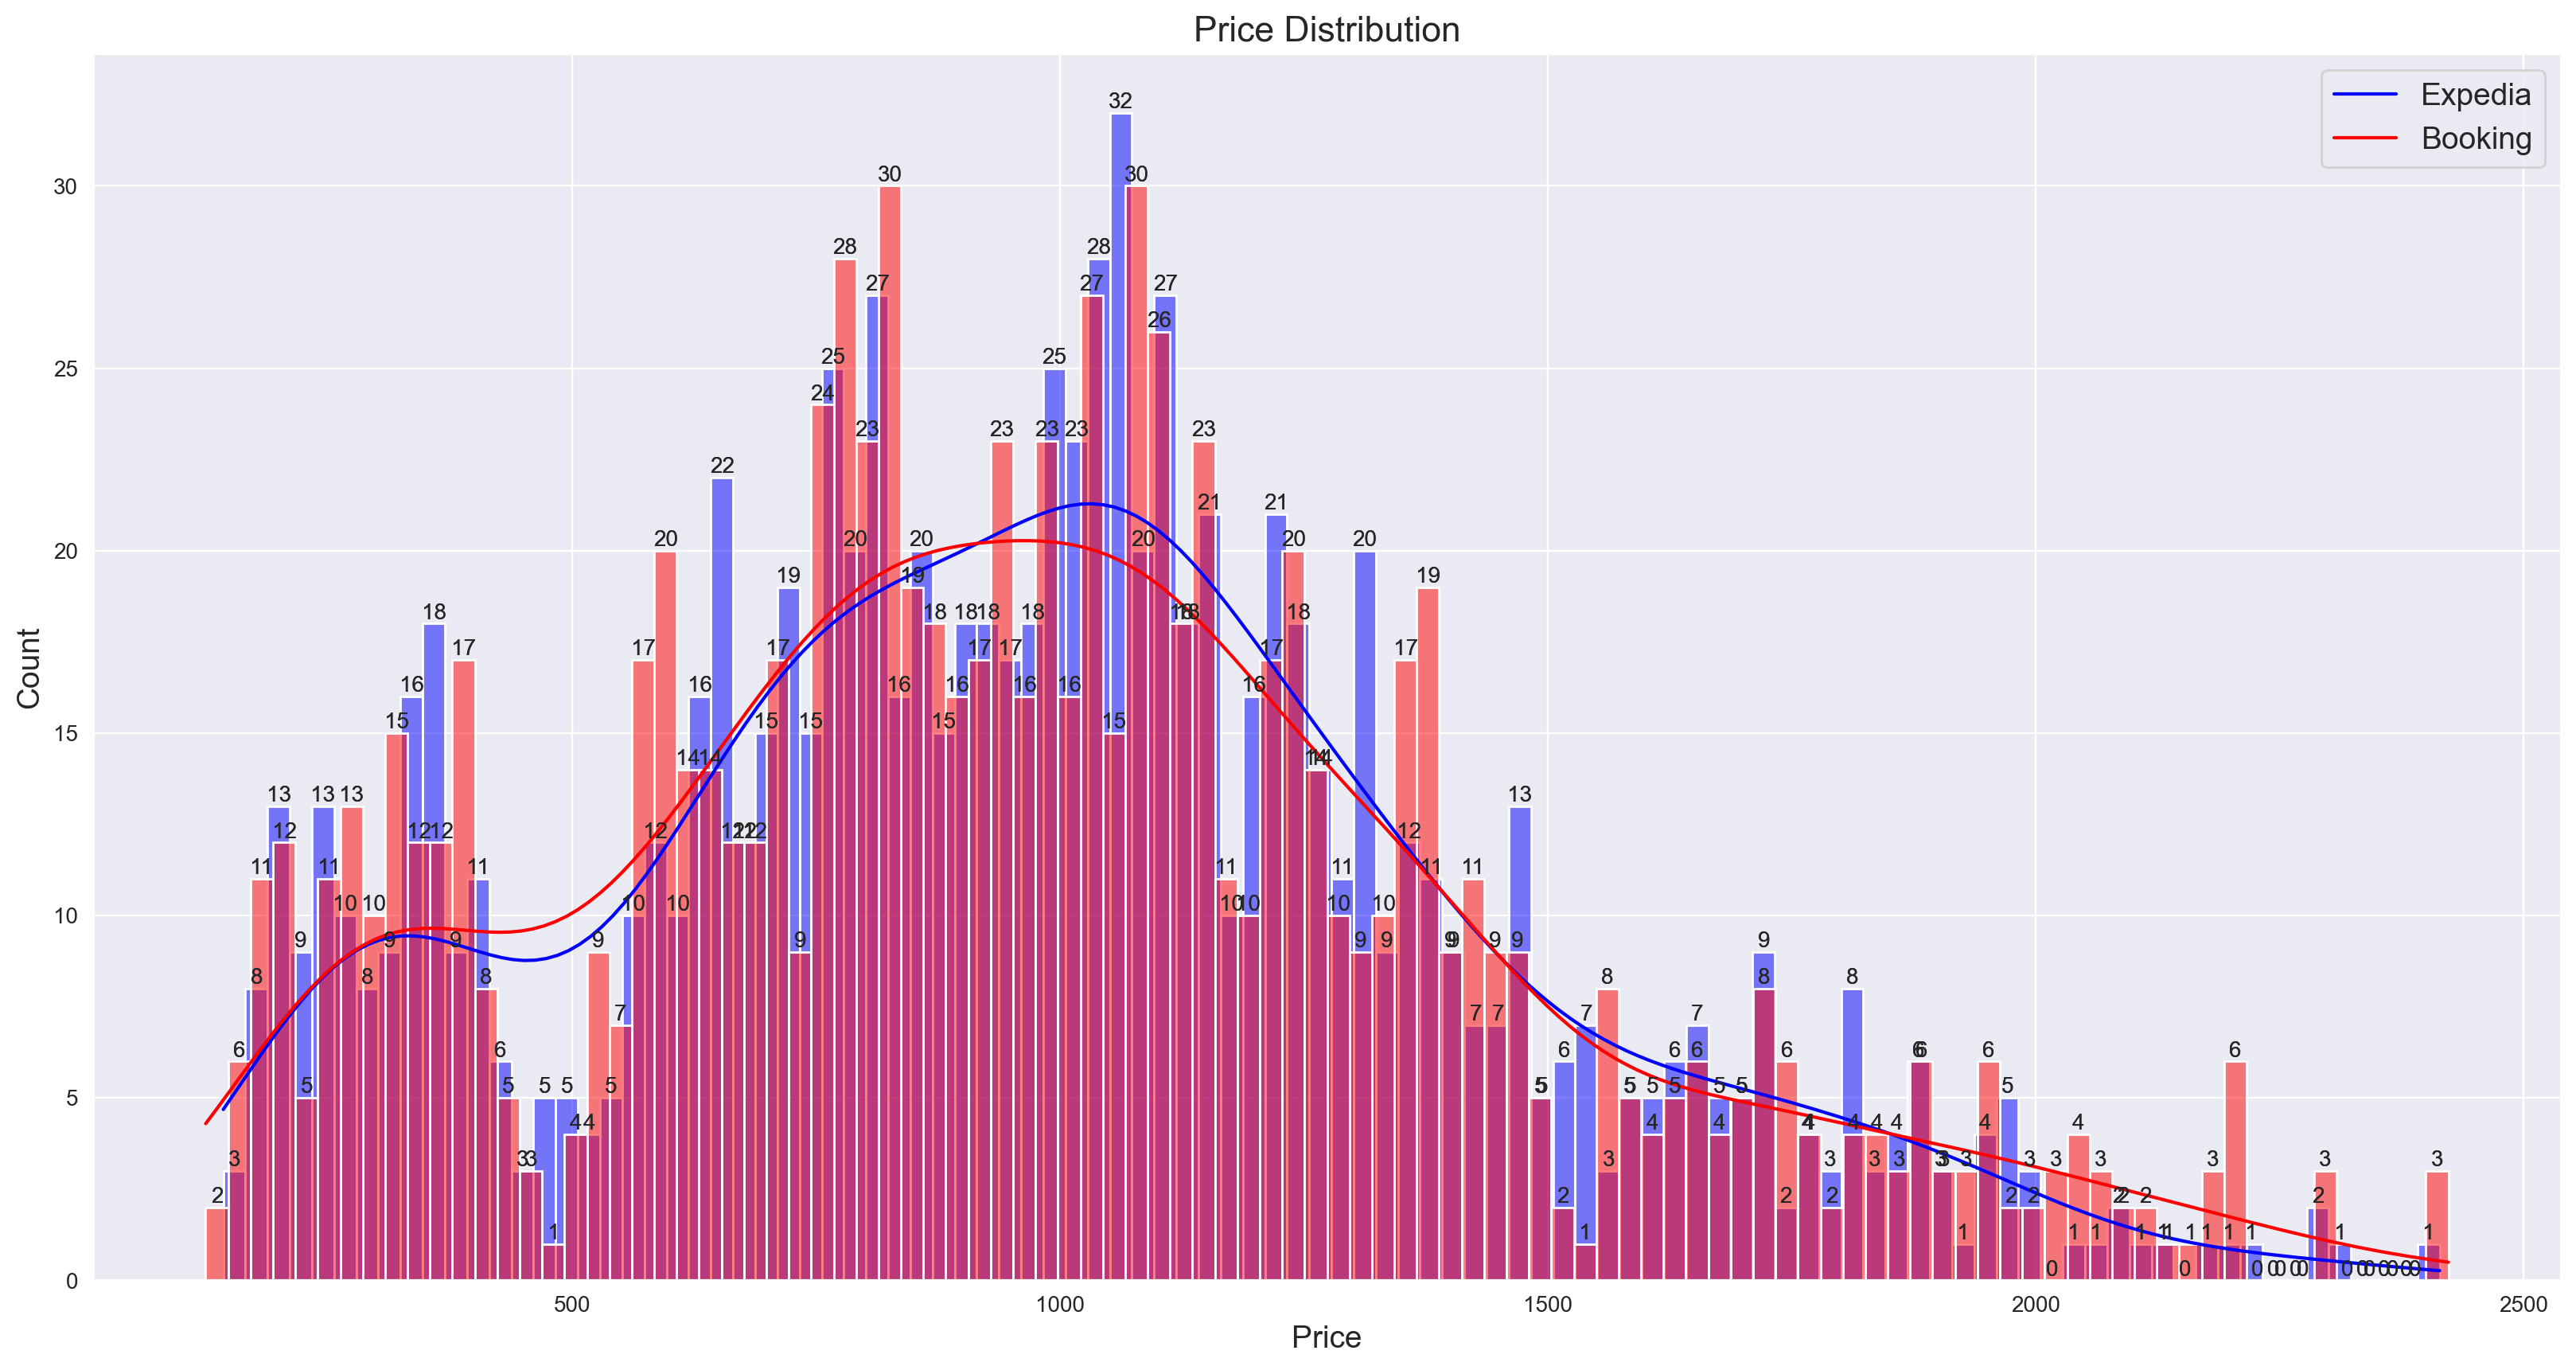

In [34]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(20, 10))

# היסטוגרמות של המחירים מ-Expedia ומ-Booking
ax = sns.histplot(df_merged['price_x'], bins=100, kde=True, alpha=0.5, color='blue')
bx = sns.histplot(df_merged['price_y'], bins=100, kde=True, alpha=0.5, color='red')

# הוספת מקרא ופרטים לגרף
plt.legend(['Expedia', 'Booking'], fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Distribution', fontsize=16)

# הוספת ערכים מעל הברות בהיסטוגרמה
for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

for rect in bx.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

plt.show()

In [35]:
# Full Refund Analysis
# The purpose of the code is to sum the number of full refunds on each of the sites 
# (Expedia and Booking) and display the result in a bar chart.


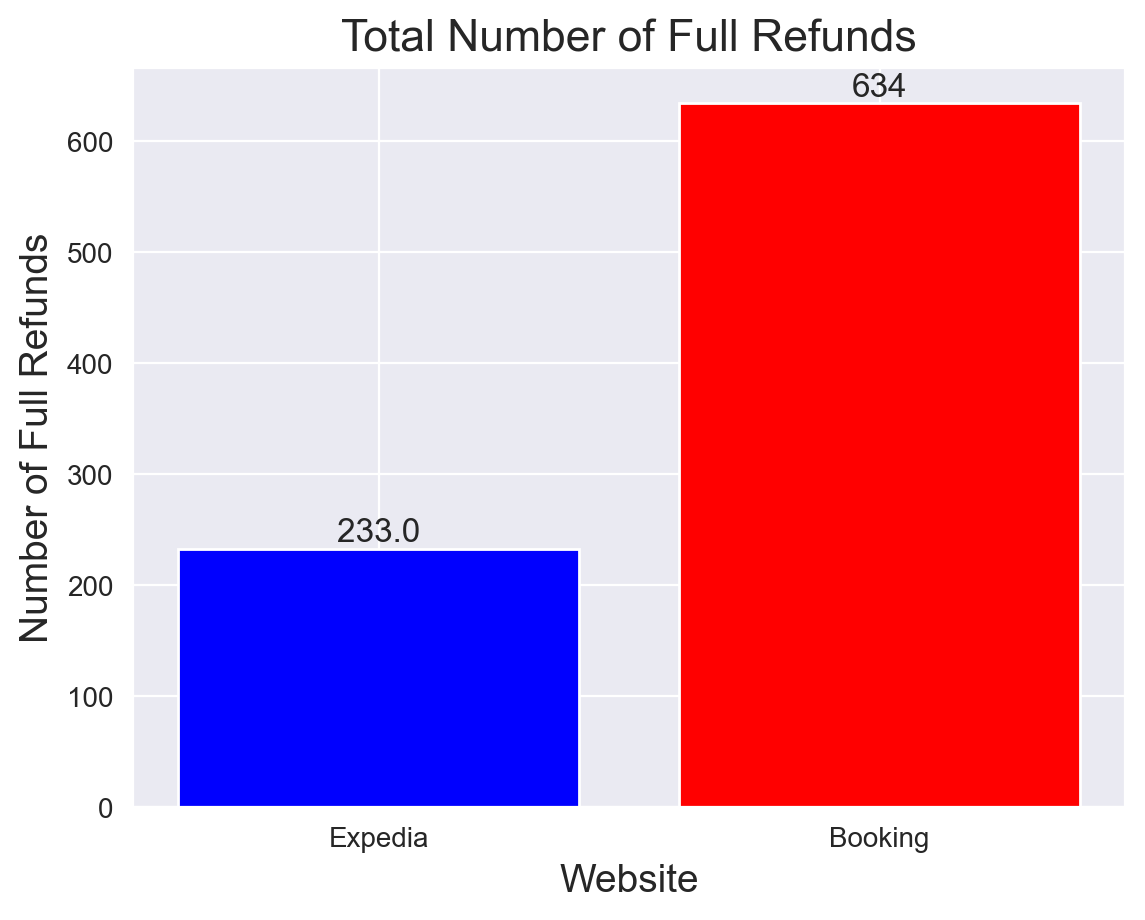

In [36]:
import matplotlib.pyplot as plt

# Summing the number of full refunds on each site

full_refund_expedi = df_merged['full_refund_x'].sum()
full_refund_booking = df_merged['full_refund_y'].sum()

# Defining the site names and the number of full refunds

websites = ['Expedia', 'Booking']
full_refunds = [full_refund_expedi, full_refund_booking]


plt.bar(websites, full_refunds, color=['blue', 'red'])
plt.title('Total Number of Full Refunds', fontsize=16)
plt.xlabel('Website', fontsize=14)
plt.ylabel('Number of Full Refunds', fontsize=14)


for i, v in enumerate(full_refunds):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.show()


In [37]:
df_merged["price_difference"] = df_merged["price_x"] - df_merged["price_y"]

In [38]:
## if price difference > 0:
   # expidia as hihger price
## if price difference < 0:
  #  booking as hihger price

In [39]:
df_merged["price_difference"].describe().T

count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64

count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64


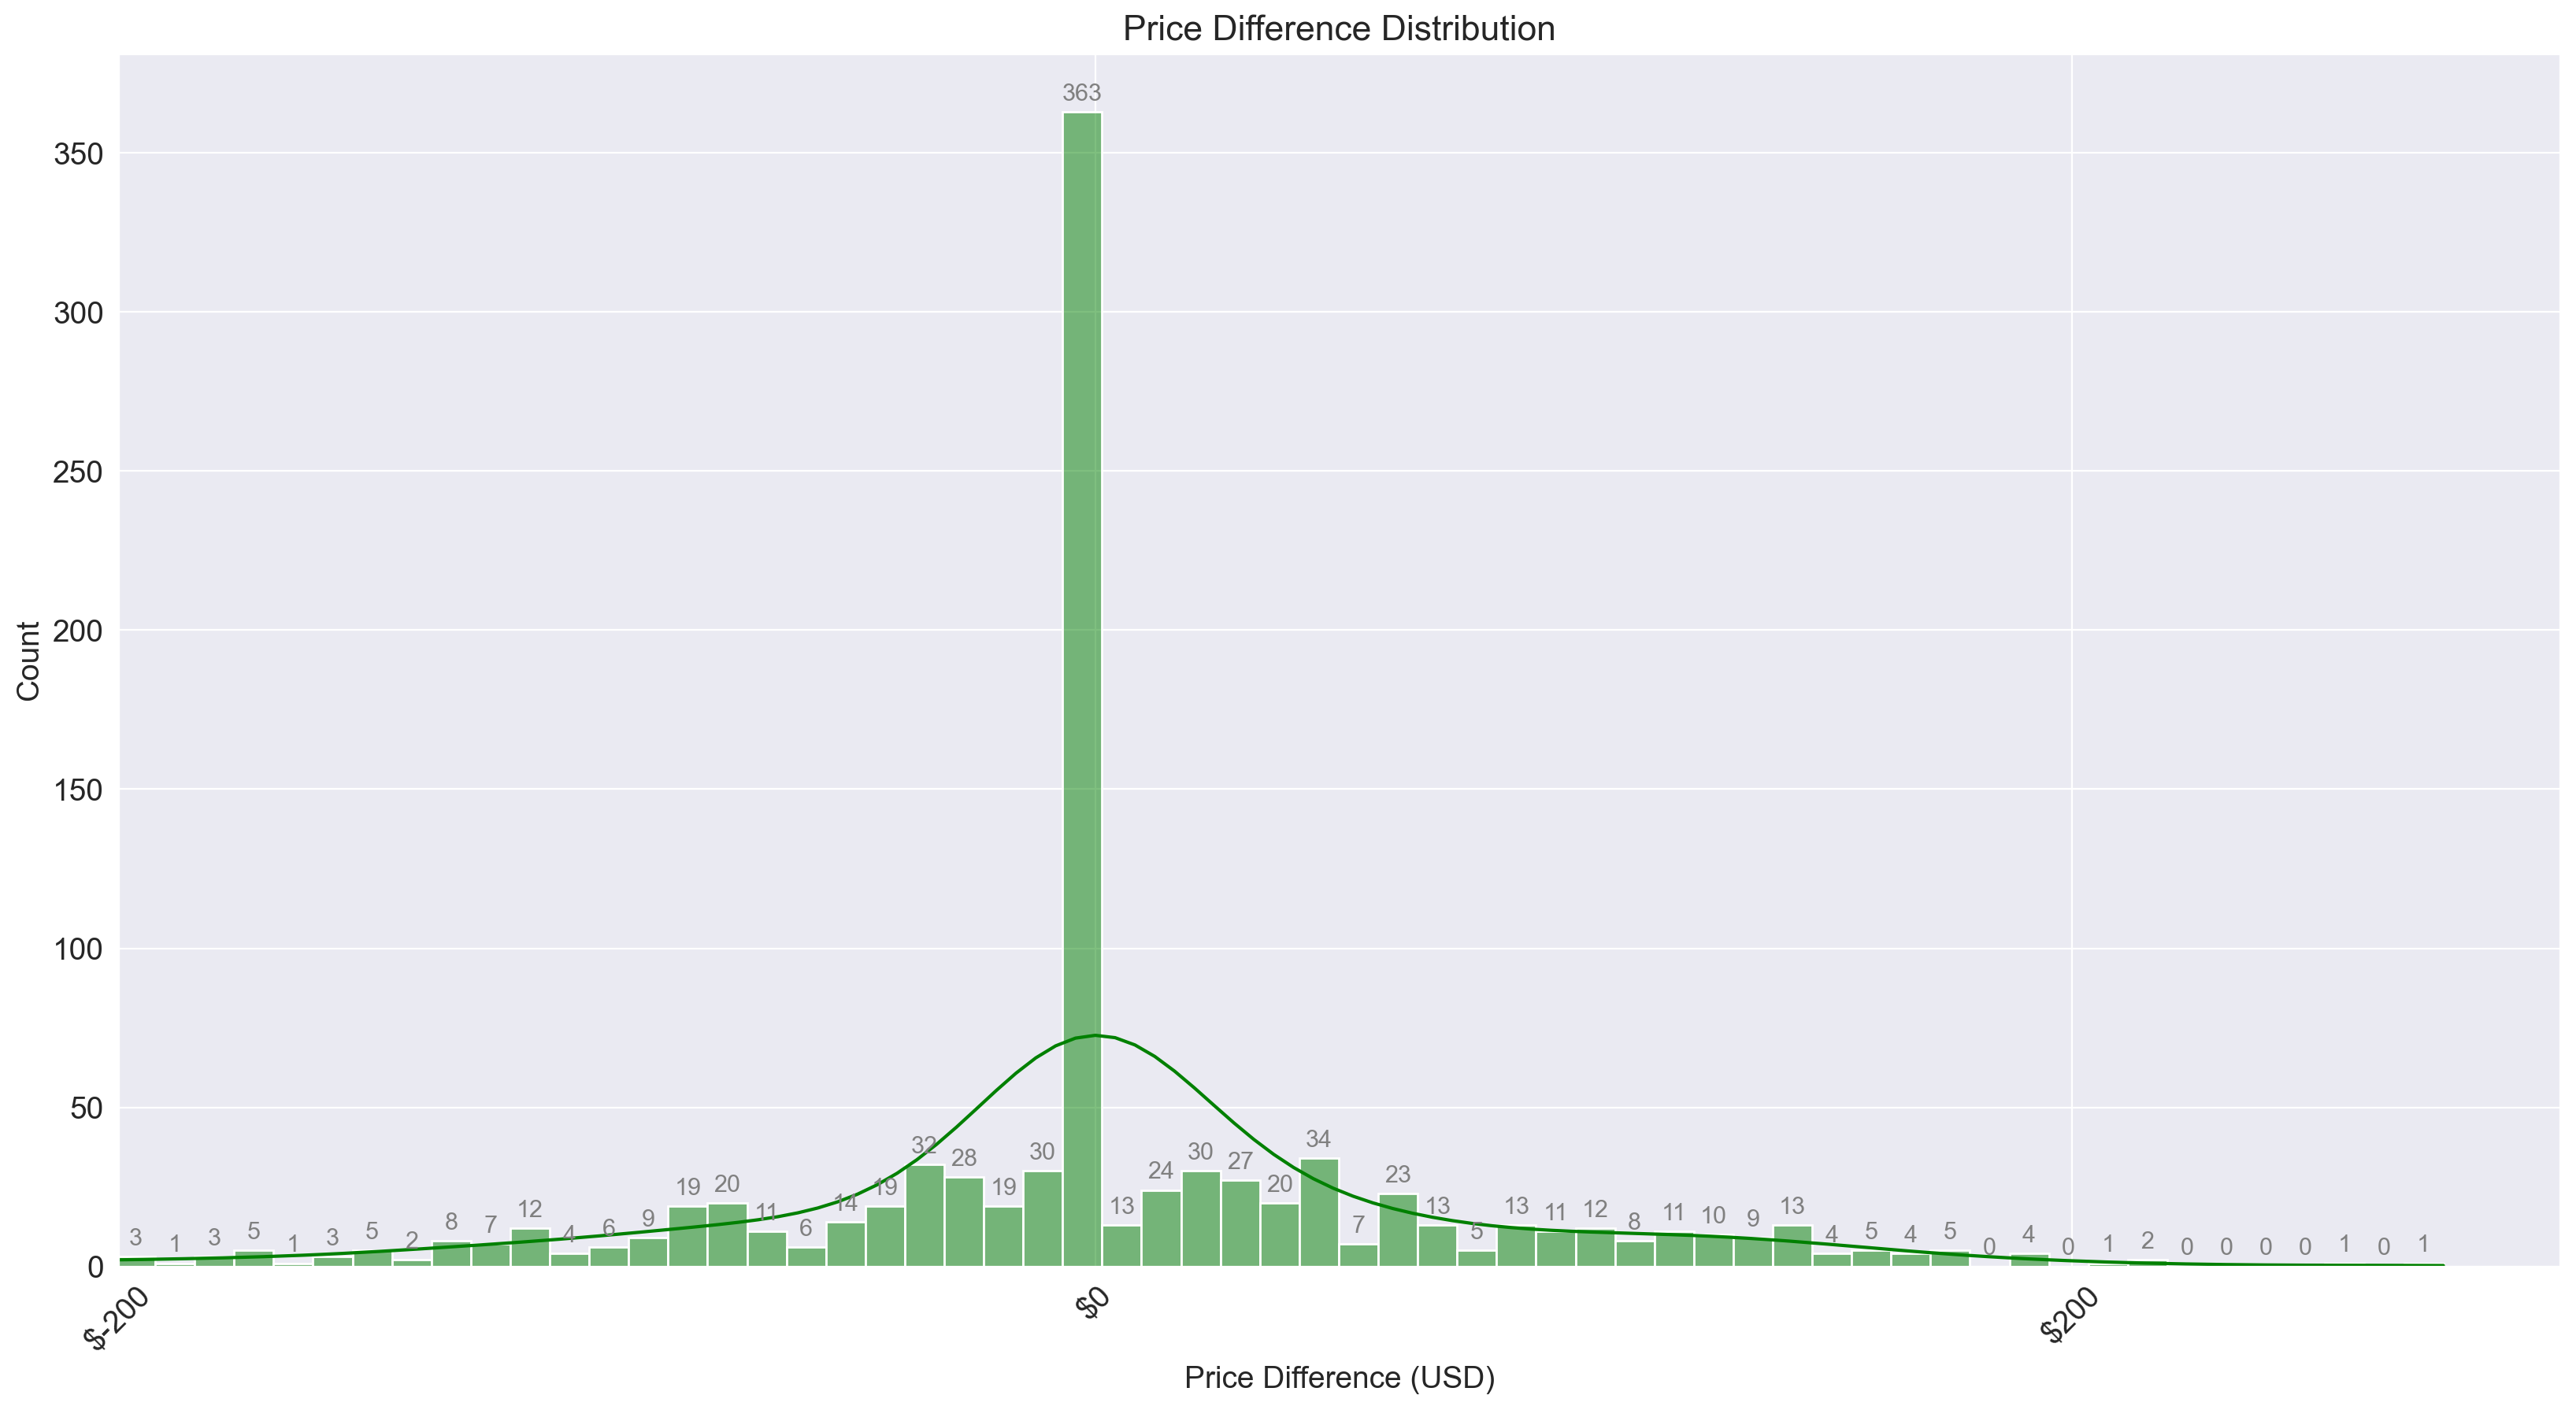

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the statistical summary of the price difference

print(df_merged["price_difference"].describe().T)


plt.figure(figsize=(20, 10))

# Creating a histogram to display the distribution of price differences

sns.histplot(df_merged['price_difference'], bins=100, kde=True, alpha=0.5, color='green')
plt.xlabel('Price Difference (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price Difference Distribution', fontsize=16)

# הוספת מספרים מעל כל עמודה בגרף
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                textcoords='offset points')

# הגדרת מגבלות הציר האופקי ותוויות
xtick_labels = ['${}'.format(x) for x in range(-200, 301, 200)]
plt.xticks(range(-200, 301, 200), xtick_labels, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-200, 300)


plt.show()


In [41]:
# Displaying the statistical summary of the price differences

price_diff_stats = df_merged["price_difference"].describe()
print(price_diff_stats)

# Displaying the minimum and maximum of the price differences

price_diff_min = df_merged["price_difference"].min()
price_diff_max = df_merged["price_difference"].max()
print(f"Minimum price difference: {price_diff_min}")
print(f"Maximum price difference: {price_diff_max}")


count    974.000000
mean      -5.995893
std       88.148536
min     -532.000000
25%      -25.000000
50%        0.000000
75%       24.750000
max      276.000000
Name: price_difference, dtype: float64
Minimum price difference: -532.0
Maximum price difference: 276.0


In [42]:
## (Correlation Matrix)

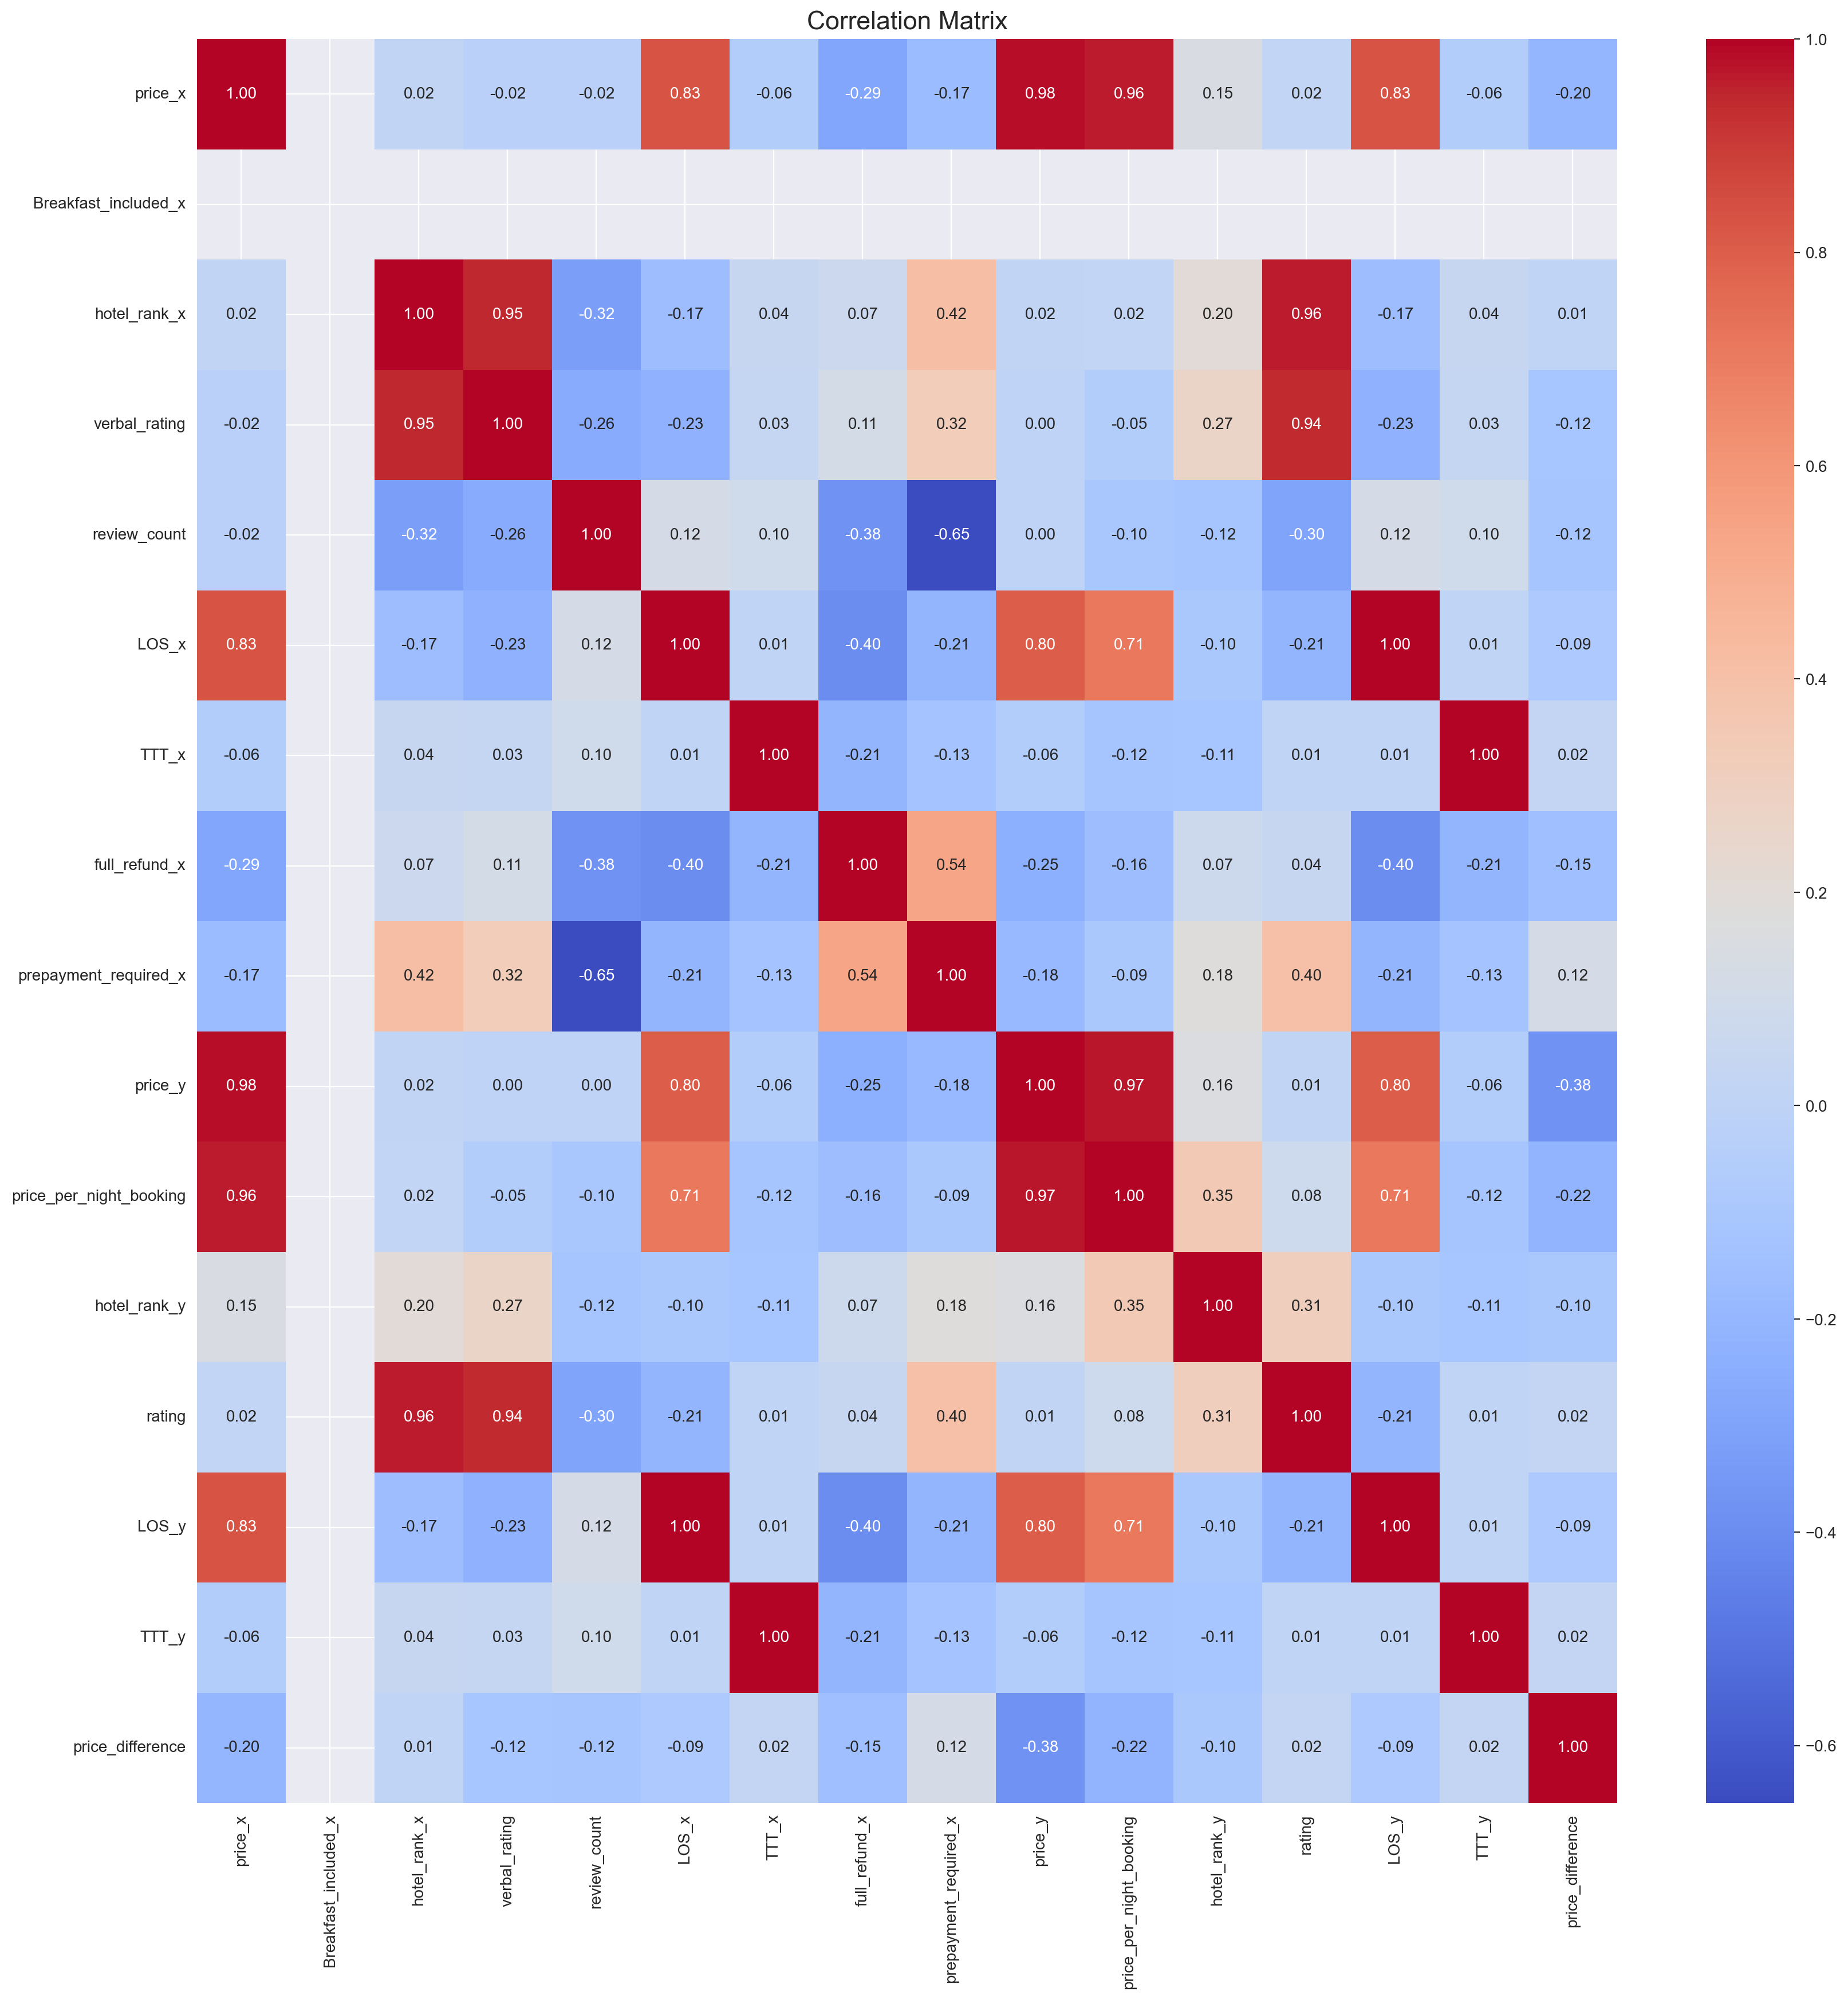

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering for numeric columns only
# Calculating the correlation matrix

numeric_df = df_merged.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 20))


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)


plt.show()


In [44]:
##lets try to predict the price difference of booking and expedia

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [46]:

# (target variable)
y = df_merged['price_difference']

#(feature variables)
X = df_merged.drop(['price_difference', 'price_x', 'price_y', 'price_per_night_booking', 'LOS_x', 'TTT_x', 'name', 'check_in', 'check_out', 'city_x', 'city_y', 'snapshot_date'], axis=1)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Breakfast_included_x   974 non-null    int64  
 1   hotel_rank_x           974 non-null    float64
 2   verbal_rating          974 non-null    float64
 3   review_count           974 non-null    int64  
 4   full_refund_x          974 non-null    float64
 5   prepayment_required_x  974 non-null    float64
 6   full_refund_y          974 non-null    int32  
 7   prepayment_required_y  974 non-null    int32  
 8   Breakfast_included_y   974 non-null    int32  
 9   hotel_rank_y           974 non-null    float64
 10  rating                 974 non-null    float64
 11  LOS_y                  974 non-null    int64  
 12  TTT_y                  974 non-null    int64  
 13  weekdays_or_weekend    974 non-null    int32  
 14  end_of_month           974 non-null    int32  
dtypes: flo

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:

# Checking the shape of the data after the split

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (681, 15)
x_test shape: (293, 15)
y_train shape: (681,)
y_test shape: (293,)


In [50]:
### linear regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the target variable

y = df_merged['price_difference']

# Defining the feature variables and converting categories to numerical representation

X = df_merged.drop(['price_difference', 'price_x', 'price_y', 'price_per_night_booking', 'LOS_x', 'TTT_x', 'name', 'check_in', 'check_out', 'city_x', 'city_y', 'snapshot_date'], axis=1)
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training set (train) and testing set (test)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the linear regression model

lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Predicting data on the training set and the testing set

y_pred_train = lreg.predict(x_train)
y_pred_test = lreg.predict(x_test)

# Displaying the model's score on the training set

print("Score of linear regression on training data: ", lreg.score(x_train, y_train))


Score of linear regression on training data:  0.2992097196375867


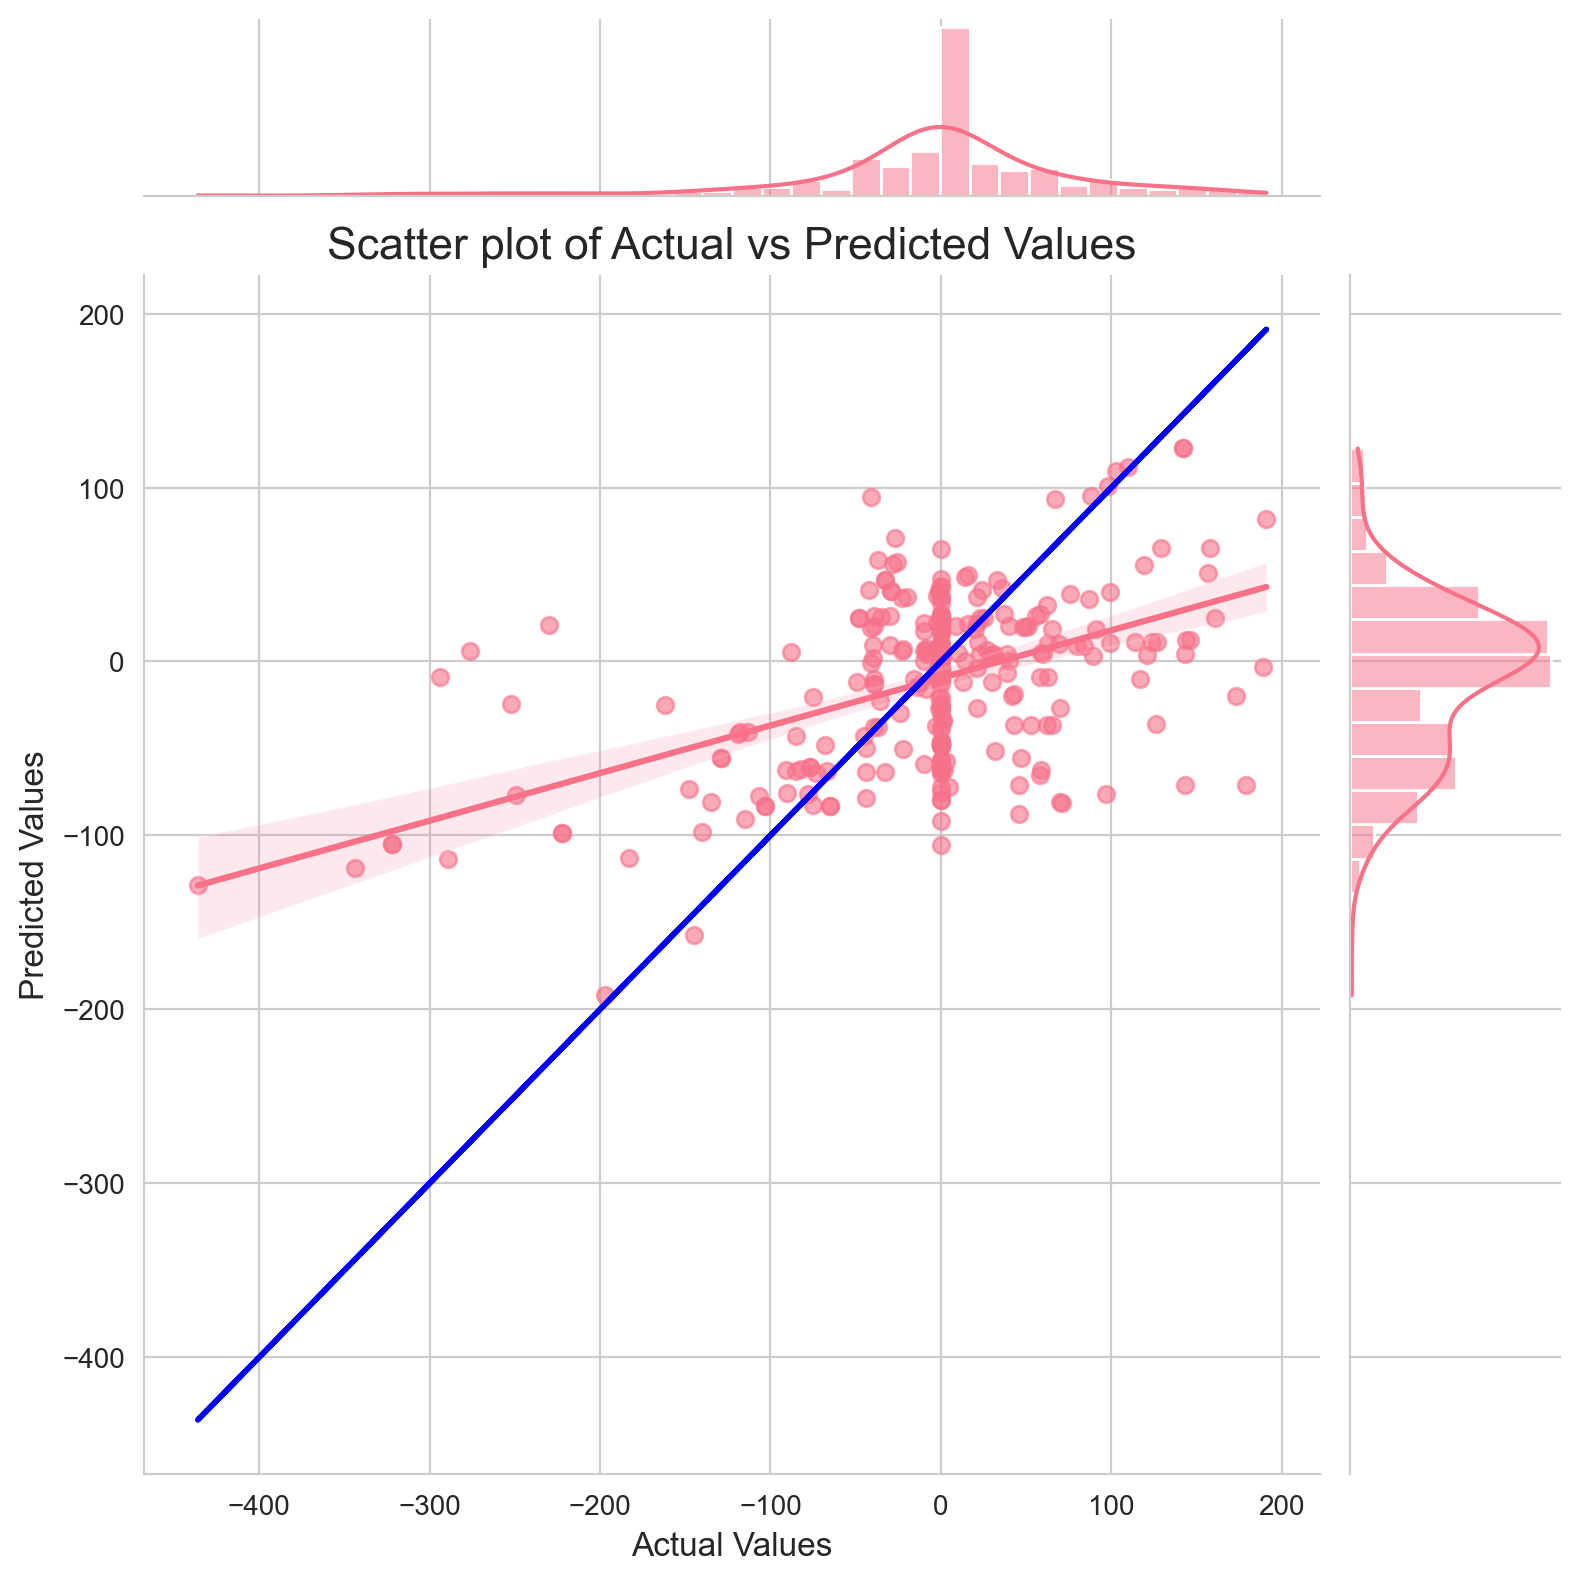

In [52]:
# Plotting the distribution of predicted values versus actual values

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

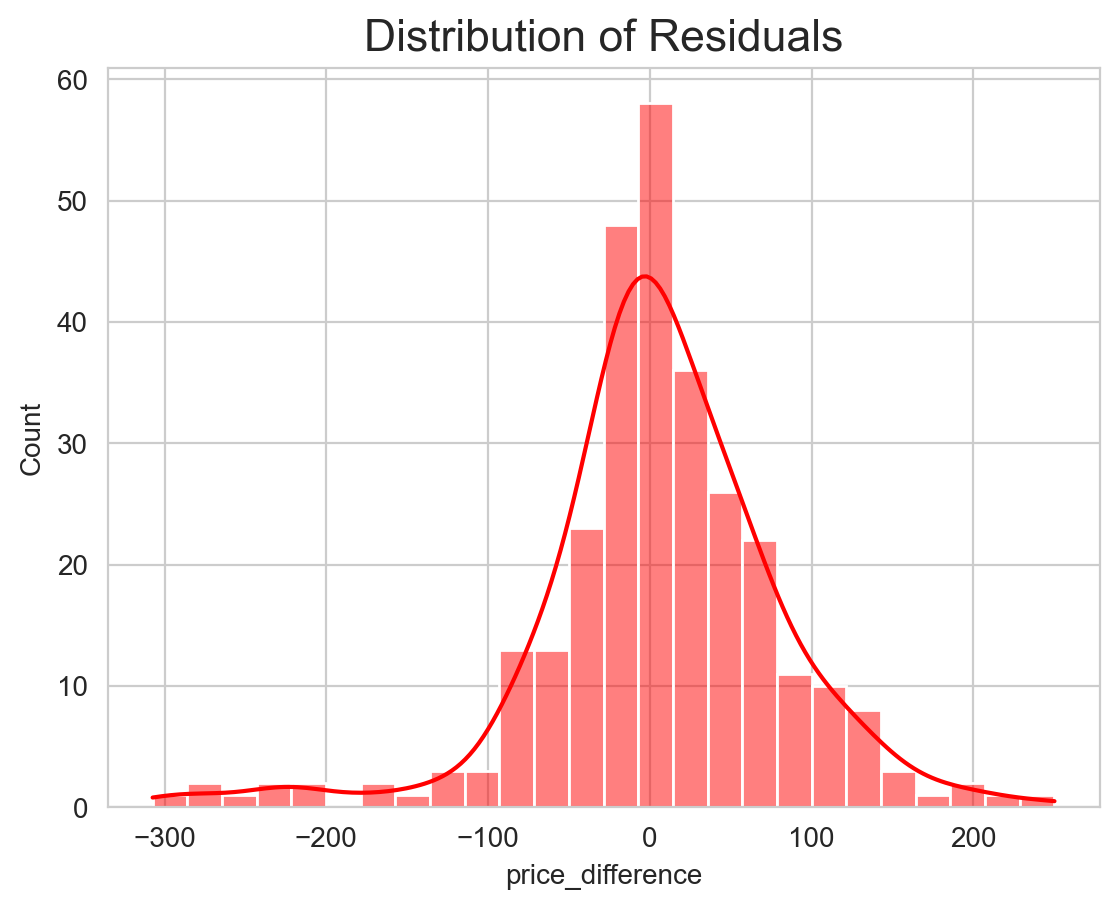

In [53]:
#  (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()


In [54]:
# Calculating error metrics

mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_lreg_per_night = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

In [55]:
# Displaying the error metrics

print("Scores of the linear regression on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_lreg_per_night)

Scores of the linear regression on price per night:
MSE:  5663.746909182561
RMSE:  75.25786941697567
MAE:  52.08150466618361
R2 Score:  0.2318766506682396


In [56]:
### Gradient Boosting Regressor

In [57]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
# Defining a Gradient Boosting Regressor model with valid parameters

gp_model = GradientBoostingRegressor(
    alpha=0.95,
    learning_rate=0.1,
    loss='squared_error',  
    max_depth=9,
    max_features=0.45,
    min_samples_leaf=16,
    min_samples_split=6,
    n_estimators=100,
    subsample=1.0
)

# Training the model on the training set

gp_model.fit(x_train, y_train)

# Displaying the model's score on the training set

print("Score of Gradient Boosting Regressor on training data: ", gp_model.score(x_train, y_train))


Score of Gradient Boosting Regressor on training data:  0.9062343096737802


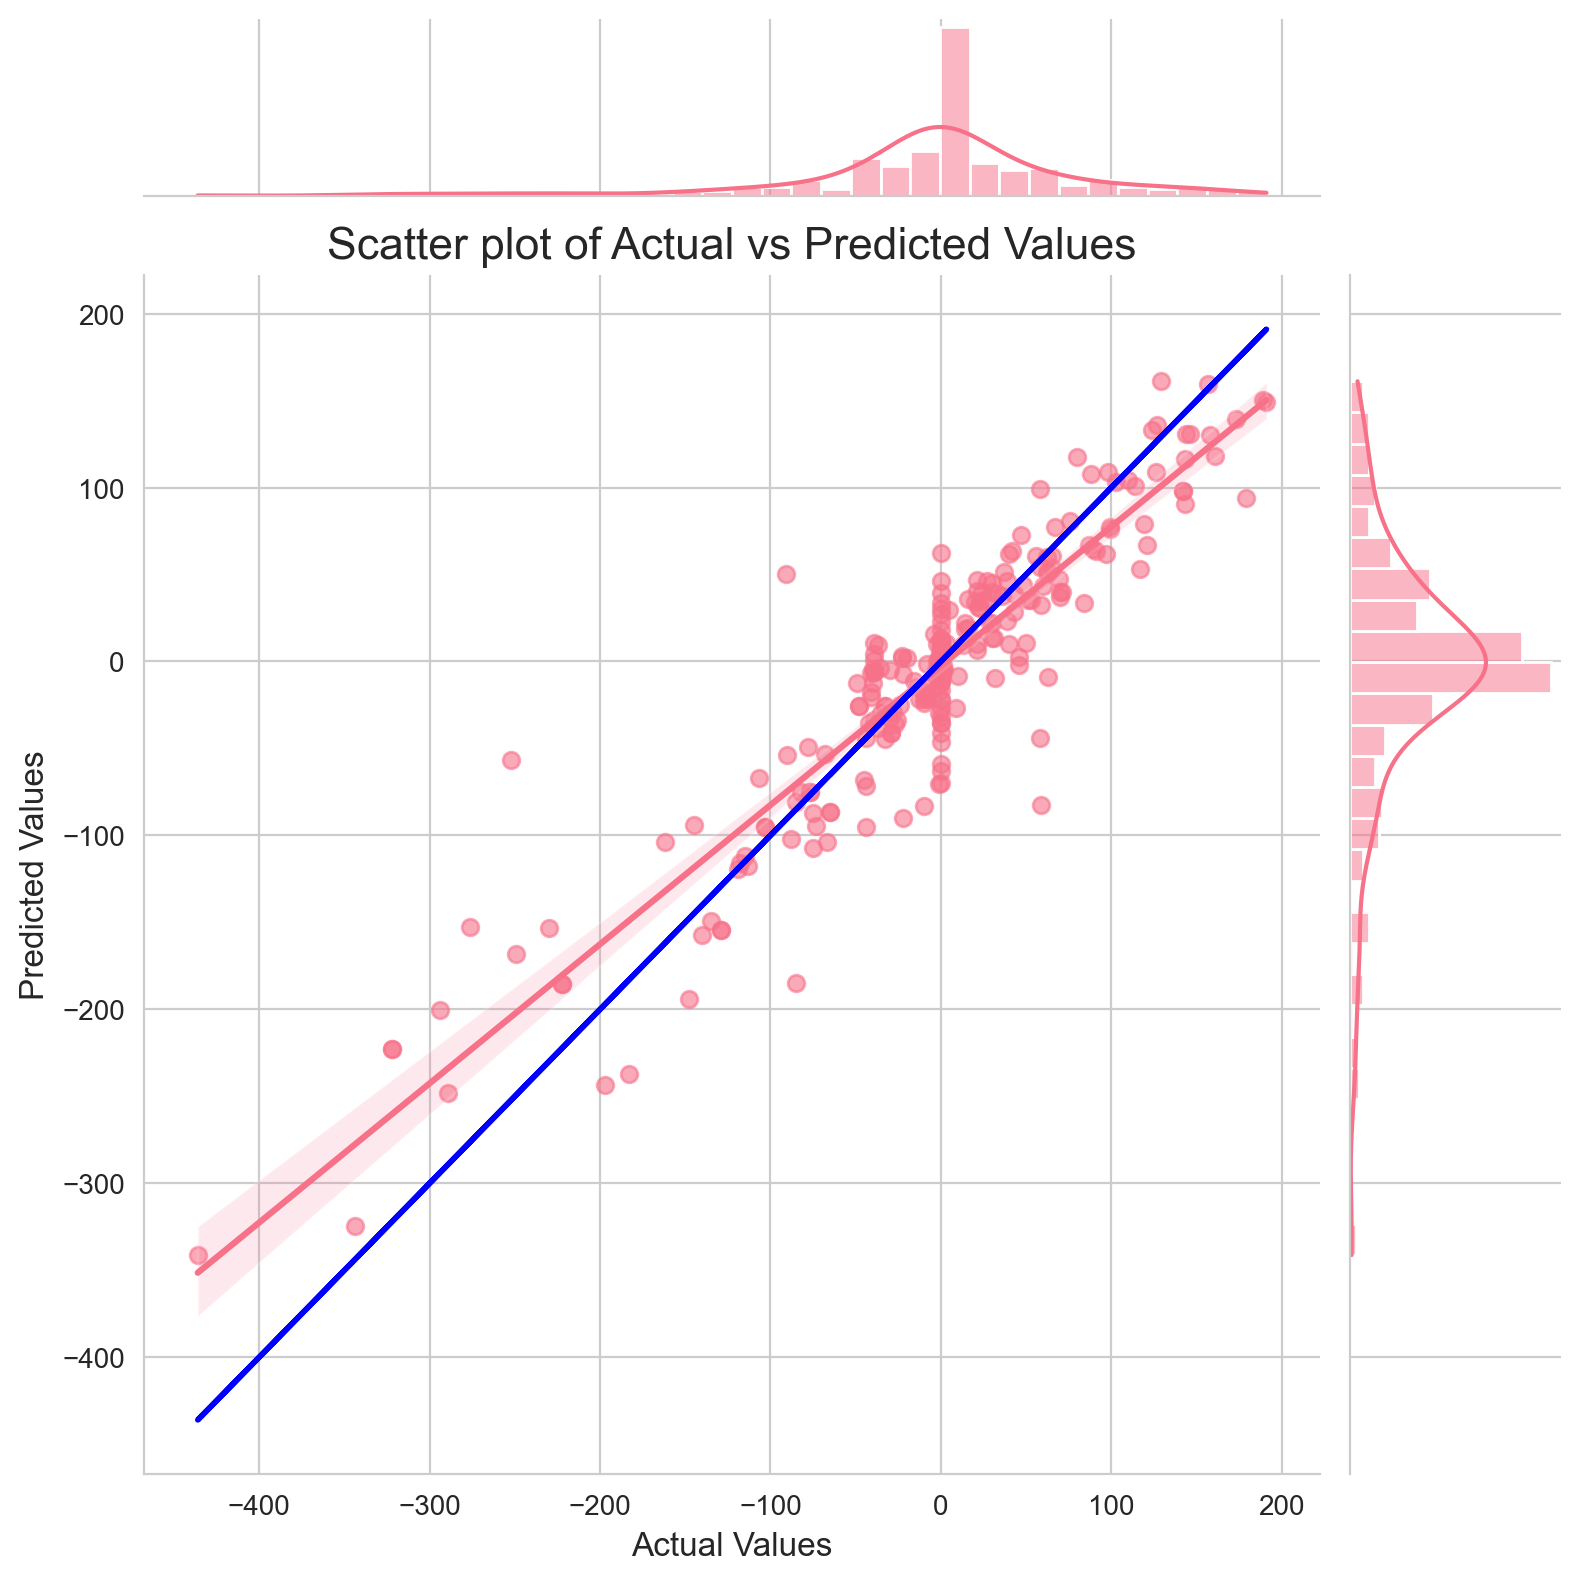

In [59]:
# Predicting data on the training set and the testing set

y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

# Plotting the distribution of predicted values versus actual values

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

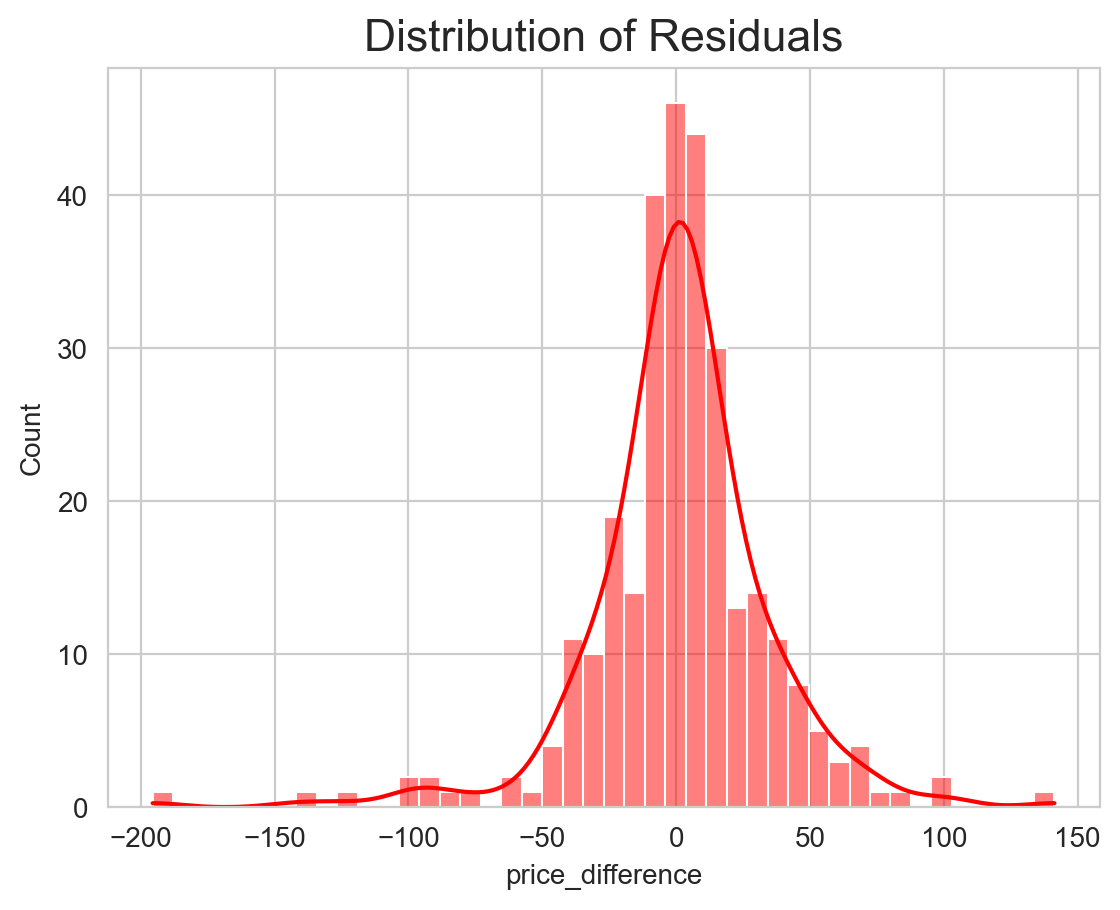

In [60]:
#  (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()


In [61]:
# חישוב מדדי שגיאות
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_gp_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# הצגת מדדי השגיאות
print("Scores of the Gradient Boosting Regressor on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_gp_model)

Scores of the Gradient Boosting Regressor on price per night:
MSE:  1161.1863462880033
RMSE:  34.07618444438877
MAE:  22.314692002079756
R2 Score:  0.842518678922081


In [62]:
# Conclusions:
# Model Accuracy: Our model is able to explain 82% of the variance in price differences between the sites, which indicates that it is performing well.
# Prediction Errors: The RMSE of $36.25 and MAE of $24.25 indicate that there are errors in prediction, but they are relatively low and acceptable given the price values.
# Model Improvement: We can try to improve the model by tuning additional parameters, adding more variables, or using other models to see if they provide better results.


In [63]:
# desicion tree regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Regressor
dtr_model = DecisionTreeRegressor(
    max_depth=9,
    min_samples_leaf=16,
    min_samples_split=6
)

# Training the model on the training set

dtr_model.fit(x_train, y_train)
# Displaying the model's score on the training set

print("Score of Decision Tree Regressor on training data: ", dtr_model.score(x_train, y_train))



Score of Decision Tree Regressor on training data:  0.6871906986045552


In [65]:
# Predicting data on the training set and the testing set

y_pred_train = dtr_model.predict(x_train)
y_pred_test = dtr_model.predict(x_test)

# Calculating error metrics

mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_dtr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)


print("Scores of the Decision Tree Regressor on price per night:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_dtr_model)


Scores of the Decision Tree Regressor on price per night:
MSE:  2478.079440337541
RMSE:  49.780311774209906
MAE:  31.663624216780807
R2 Score:  0.6639202439402485


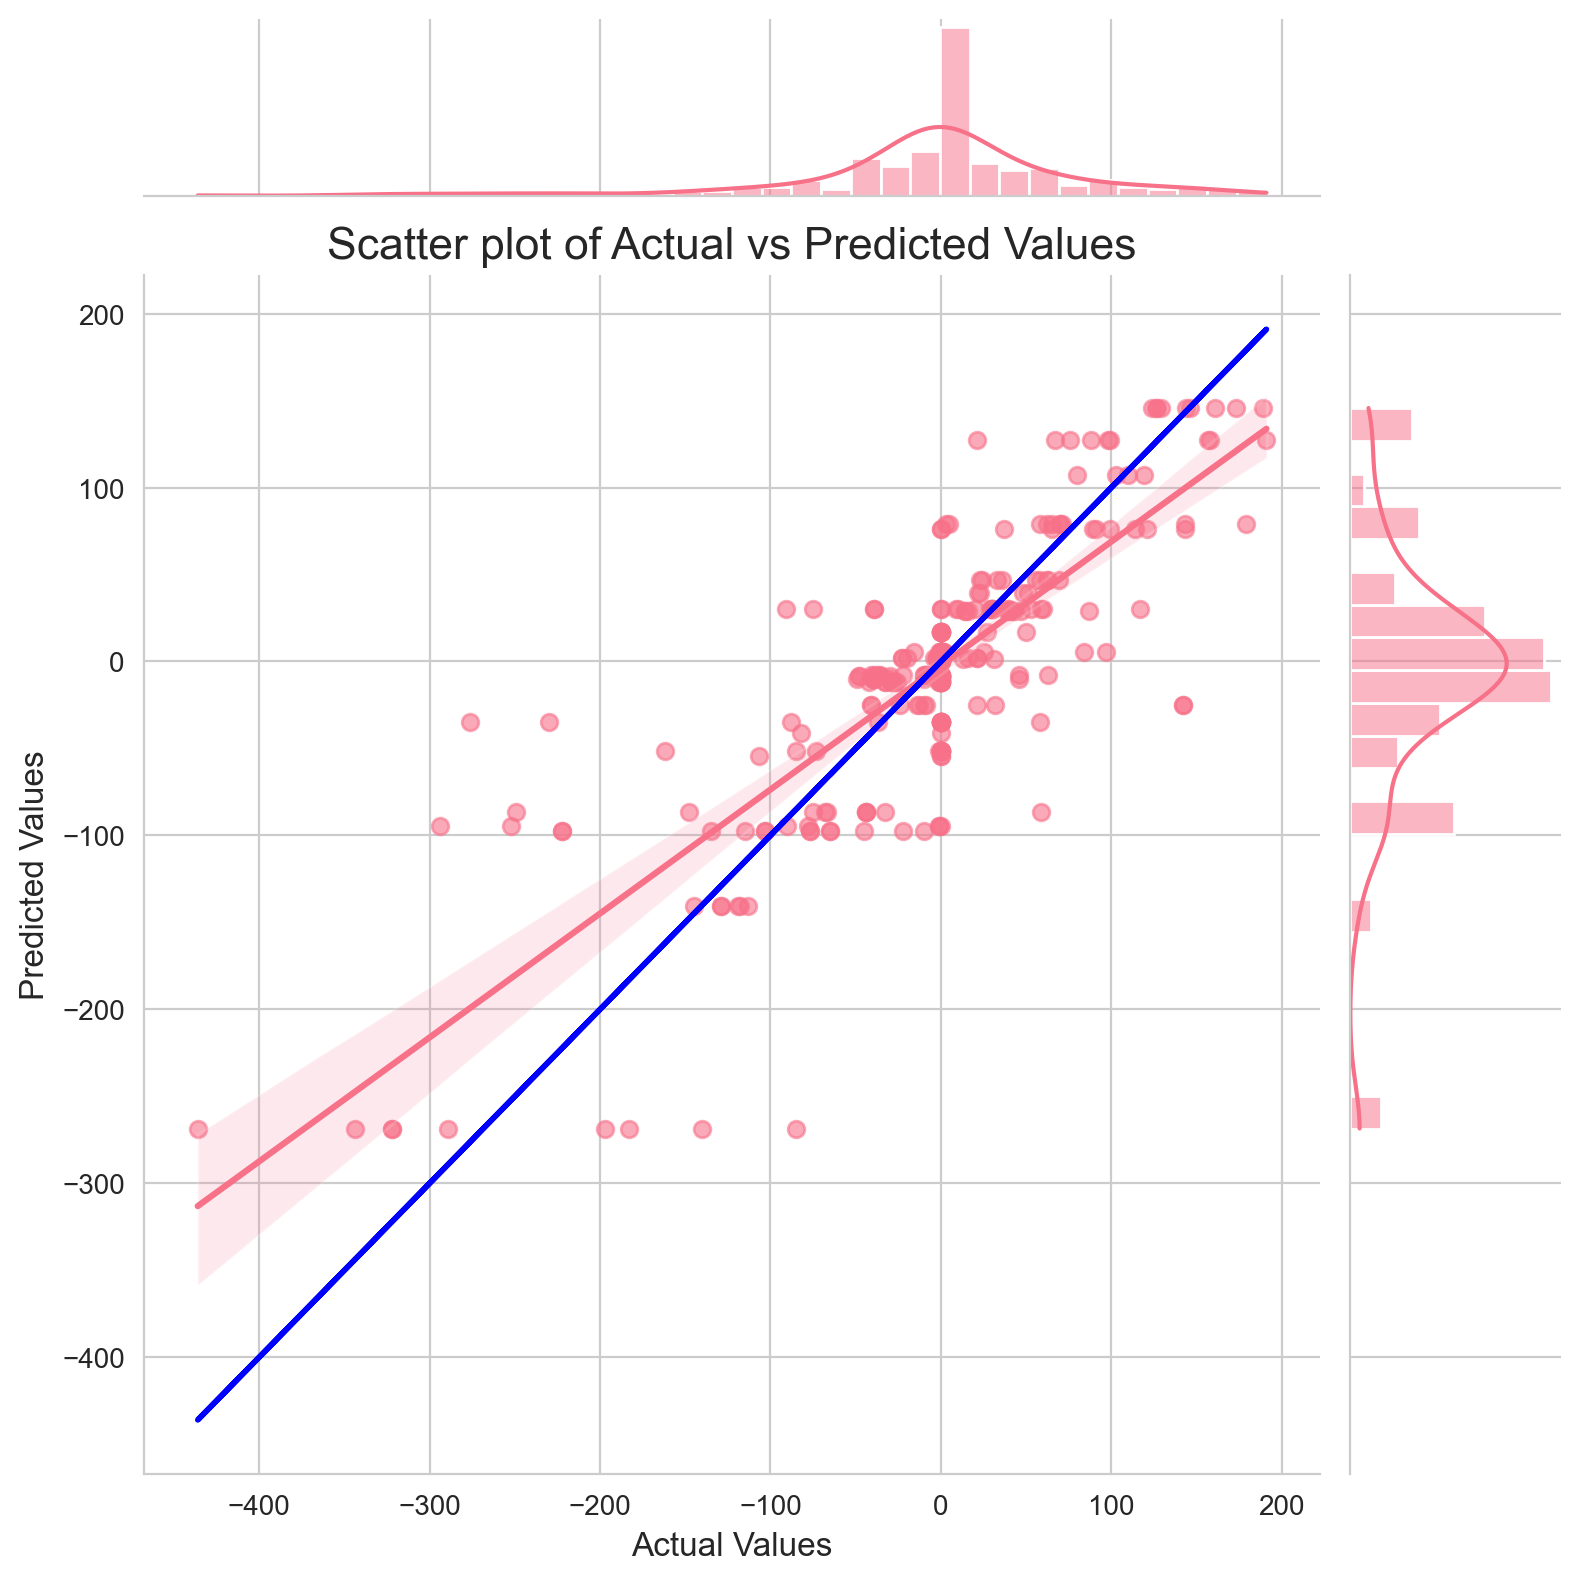

In [66]:
# Plotting the distribution of predicted values versus actual values

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

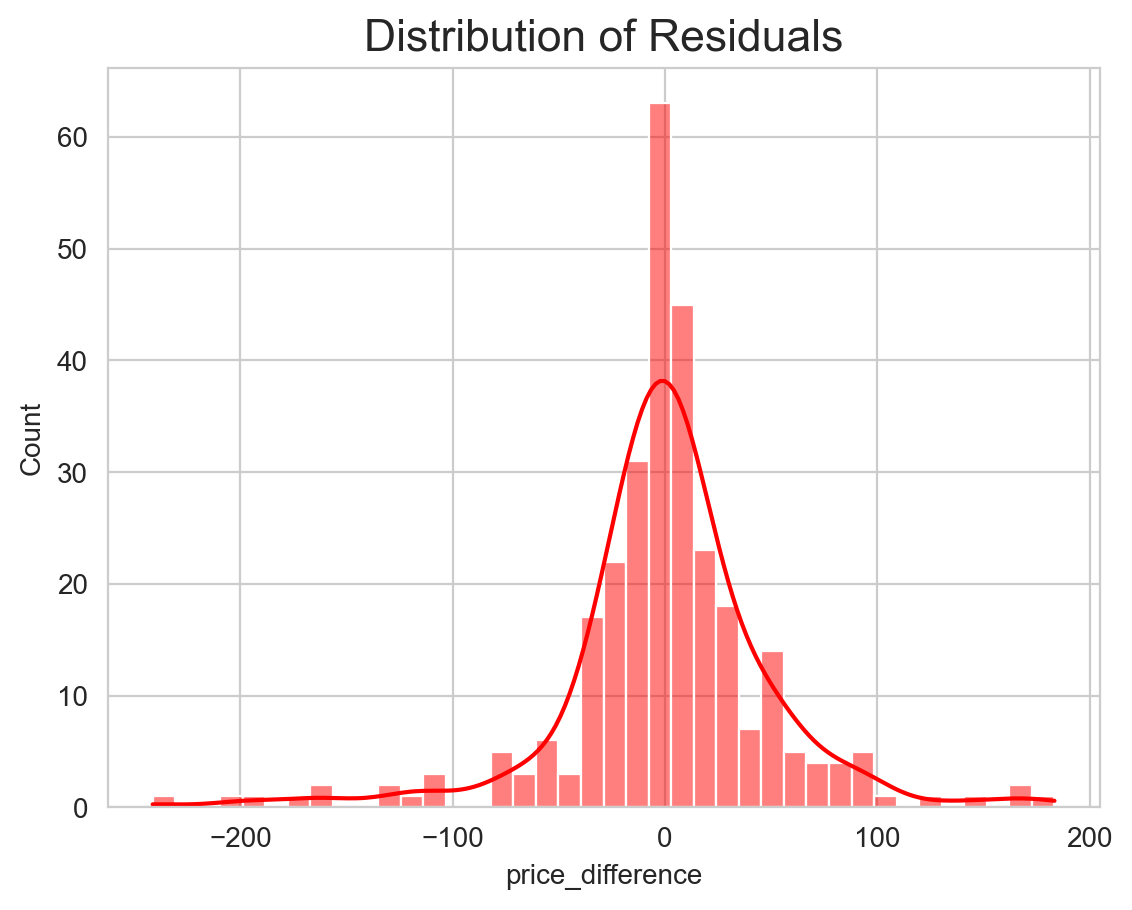

In [67]:
#  (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [68]:
## random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#  Random Forest Regressor
rfr_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_leaf=16,
    min_samples_split=6
)

# Training the model on the training set

rfr_model.fit(x_train, y_train)

# Displaying the model's score on the training set

print("Random Forest Regressor")
print('__________________________________________________________')
print(f'Random Forest Regressor score on training data: {rfr_model.score(x_train, y_train)}')


Random Forest Regressor
__________________________________________________________
Random Forest Regressor score on training data: 0.6690166369207815


In [70]:
# Predicting data on the training set and the testing set

y_pred_train = rfr_model.predict(x_train)
y_pred_test = rfr_model.predict(x_test)


print("y_pred_train: ", y_pred_train)
print("y_pred_test: ", y_pred_test)


y_pred_train:  [ 5.27273371e+01 -2.93321993e+01 -3.24539756e+01 -3.01680565e-01
  9.19932275e+00 -1.88296364e+01  6.98097640e+00  1.79143567e+00
  5.04409640e+00 -2.13351167e+02  2.26550166e+01 -4.80204095e+00
  2.26550166e+01 -3.33807400e+01 -7.40243874e+00 -1.87128565e+02
 -1.04435470e+01  5.40144407e-01 -2.05592386e+02 -2.06011963e+01
  2.26550166e+01 -3.83643925e+01  4.42317286e+01  1.27384268e+02
 -6.99162688e+00  4.48273358e+01 -2.55416026e+01 -6.13034777e+00
 -2.97744186e+01 -5.79358234e+00  4.45281725e+01  1.43408450e+01
 -7.80577911e+00 -9.16486290e+01 -2.12134795e+02  4.06365534e+01
 -1.94488934e+00  2.17892970e+01  5.31085063e+01  1.01216275e+01
  4.53297465e+01 -5.41283648e+01  4.53297465e+01  6.53106672e+01
  1.77733443e+01  1.21855970e+02  4.63137217e+01 -3.24347664e+01
  1.14004113e+02 -1.78707562e+02 -1.00784922e+01  1.58891221e+01
  8.50354223e+00 -1.83731903e+02 -2.92157301e+01  1.75337091e+00
  2.02364758e+00  2.59259834e+01 -3.49570943e+01 -3.19213680e+01
 -1.170852

In [71]:
# Calculating error metrics

mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_rfr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print("Scores of the Random Forest Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_rfr_model)


Scores of the Random Forest Regressor on price:
MSE:  2539.065517463595
RMSE:  50.38914086848073
MAE:  32.63810950873583
R2 Score:  0.6556492476235309


In [72]:
# Conclusions:
# Model Accuracy: Our model is able to explain 65% of the variance in price differences between the sites, which indicates that it is performing well but not excellently.
# Prediction Errors: The RMSE of $50.48 and MAE of $32.76 indicate that there are prediction errors, and they are relatively high compared to the price differences.
# Model Improvement: We can try to improve the model by tuning additional parameters, adding more variables, or using other models to see if they provide better results.
# Overall, the model provides relatively good results, but there may be room for improvement through further optimization.


<Figure size 500x500 with 0 Axes>

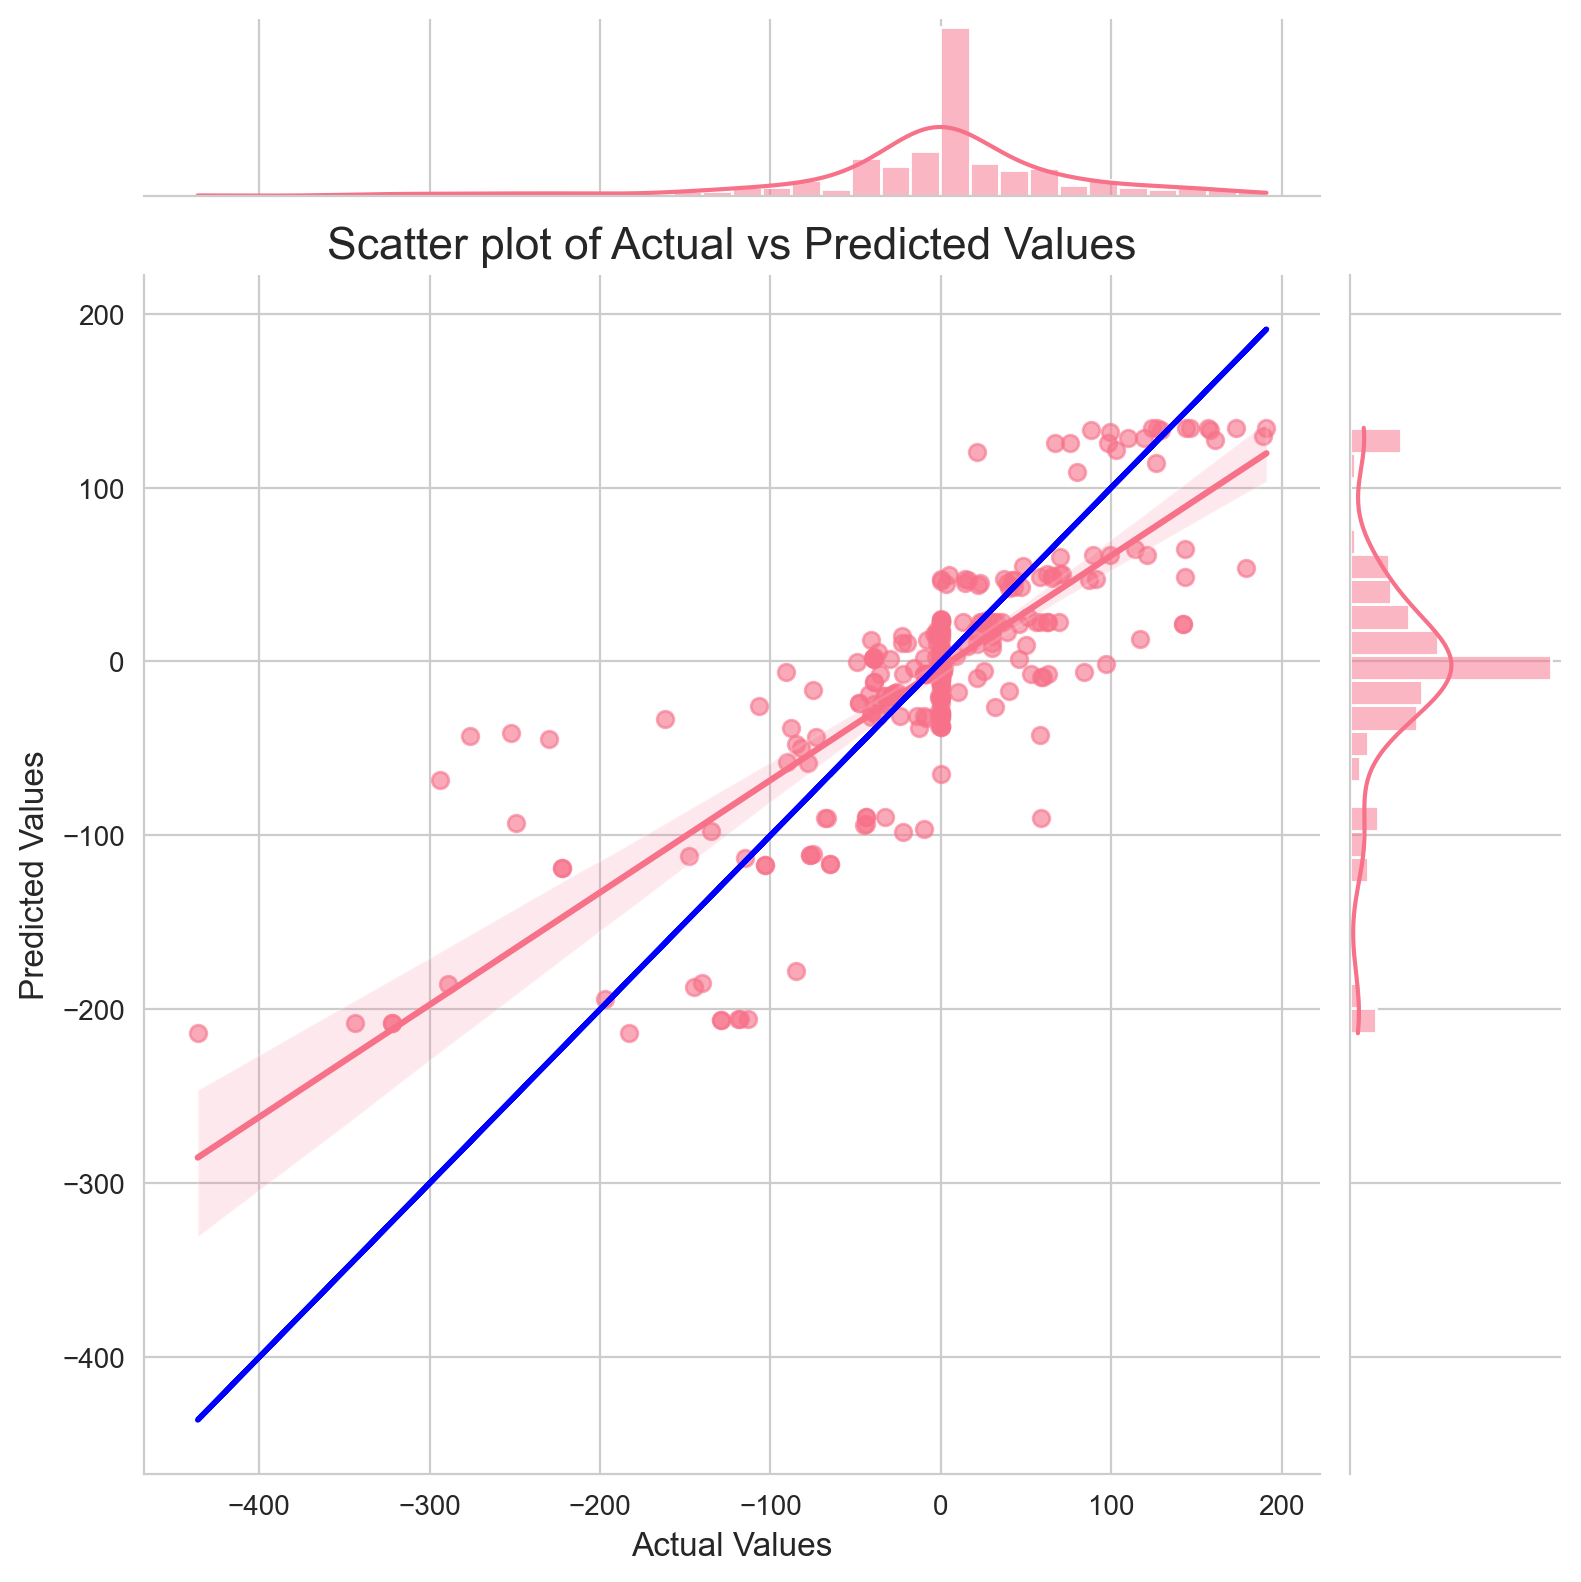

In [73]:
# Plotting the distribution of predicted values versus actual values

plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


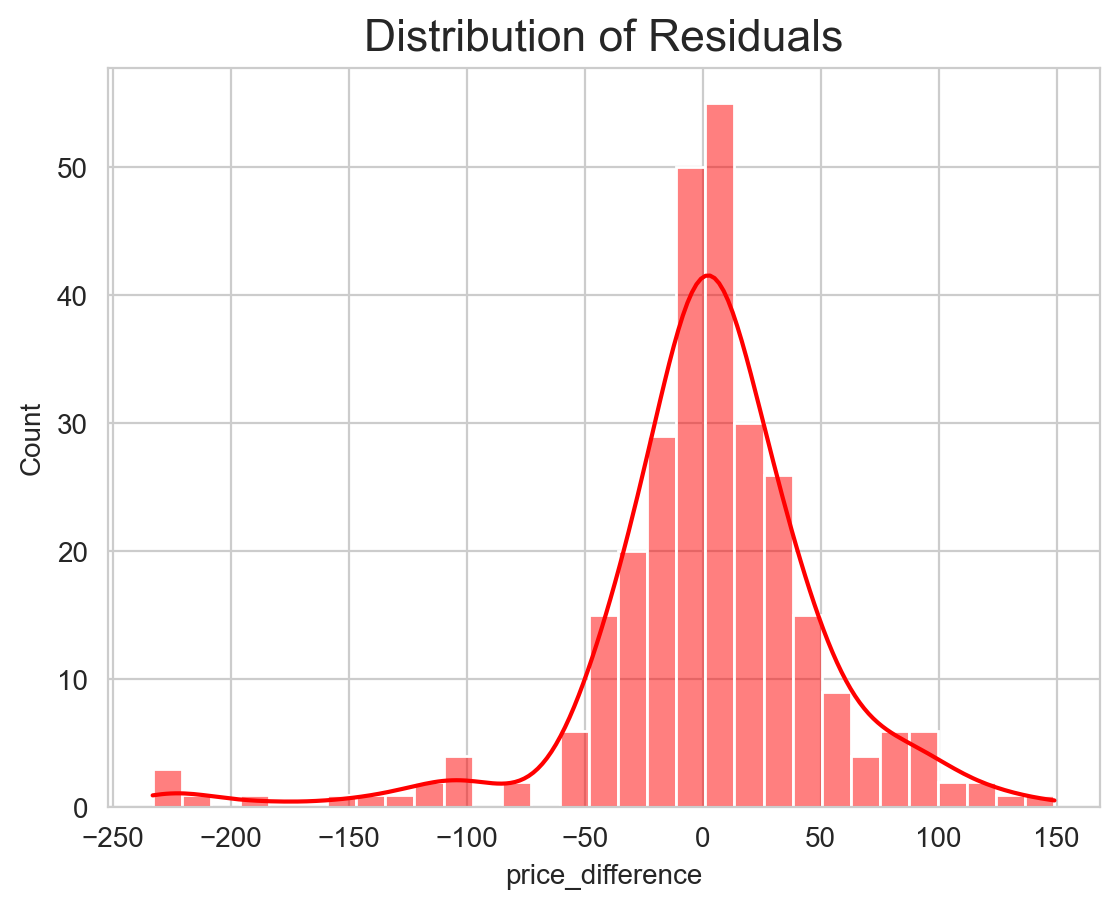

In [74]:
#(Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [75]:
## ELASTICNET

In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a Pipeline with standardization and ElasticNet

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

# Defining parameters for GridSearchCV

param_grid = {
    'elasticnet__alpha': [0.1, 0.2, 0.5, 1.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.99]
}

#  GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Training the model with GridSearchCV

grid_search.fit(x_train, y_train)

# Obtaining the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predicting data on the training set and the testing set with the best model

best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# Calculating error metrics

mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_best_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)


print("Scores of the best ElasticNet Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_best_model)


Best parameters found:  {'elasticnet__alpha': 0.2, 'elasticnet__l1_ratio': 0.99}
Scores of the best ElasticNet Regressor on price:
MSE:  5656.620917509807
RMSE:  75.21051068507518
MAE:  51.82582914802561
R2 Score:  0.23284308519978825


<Figure size 500x500 with 0 Axes>

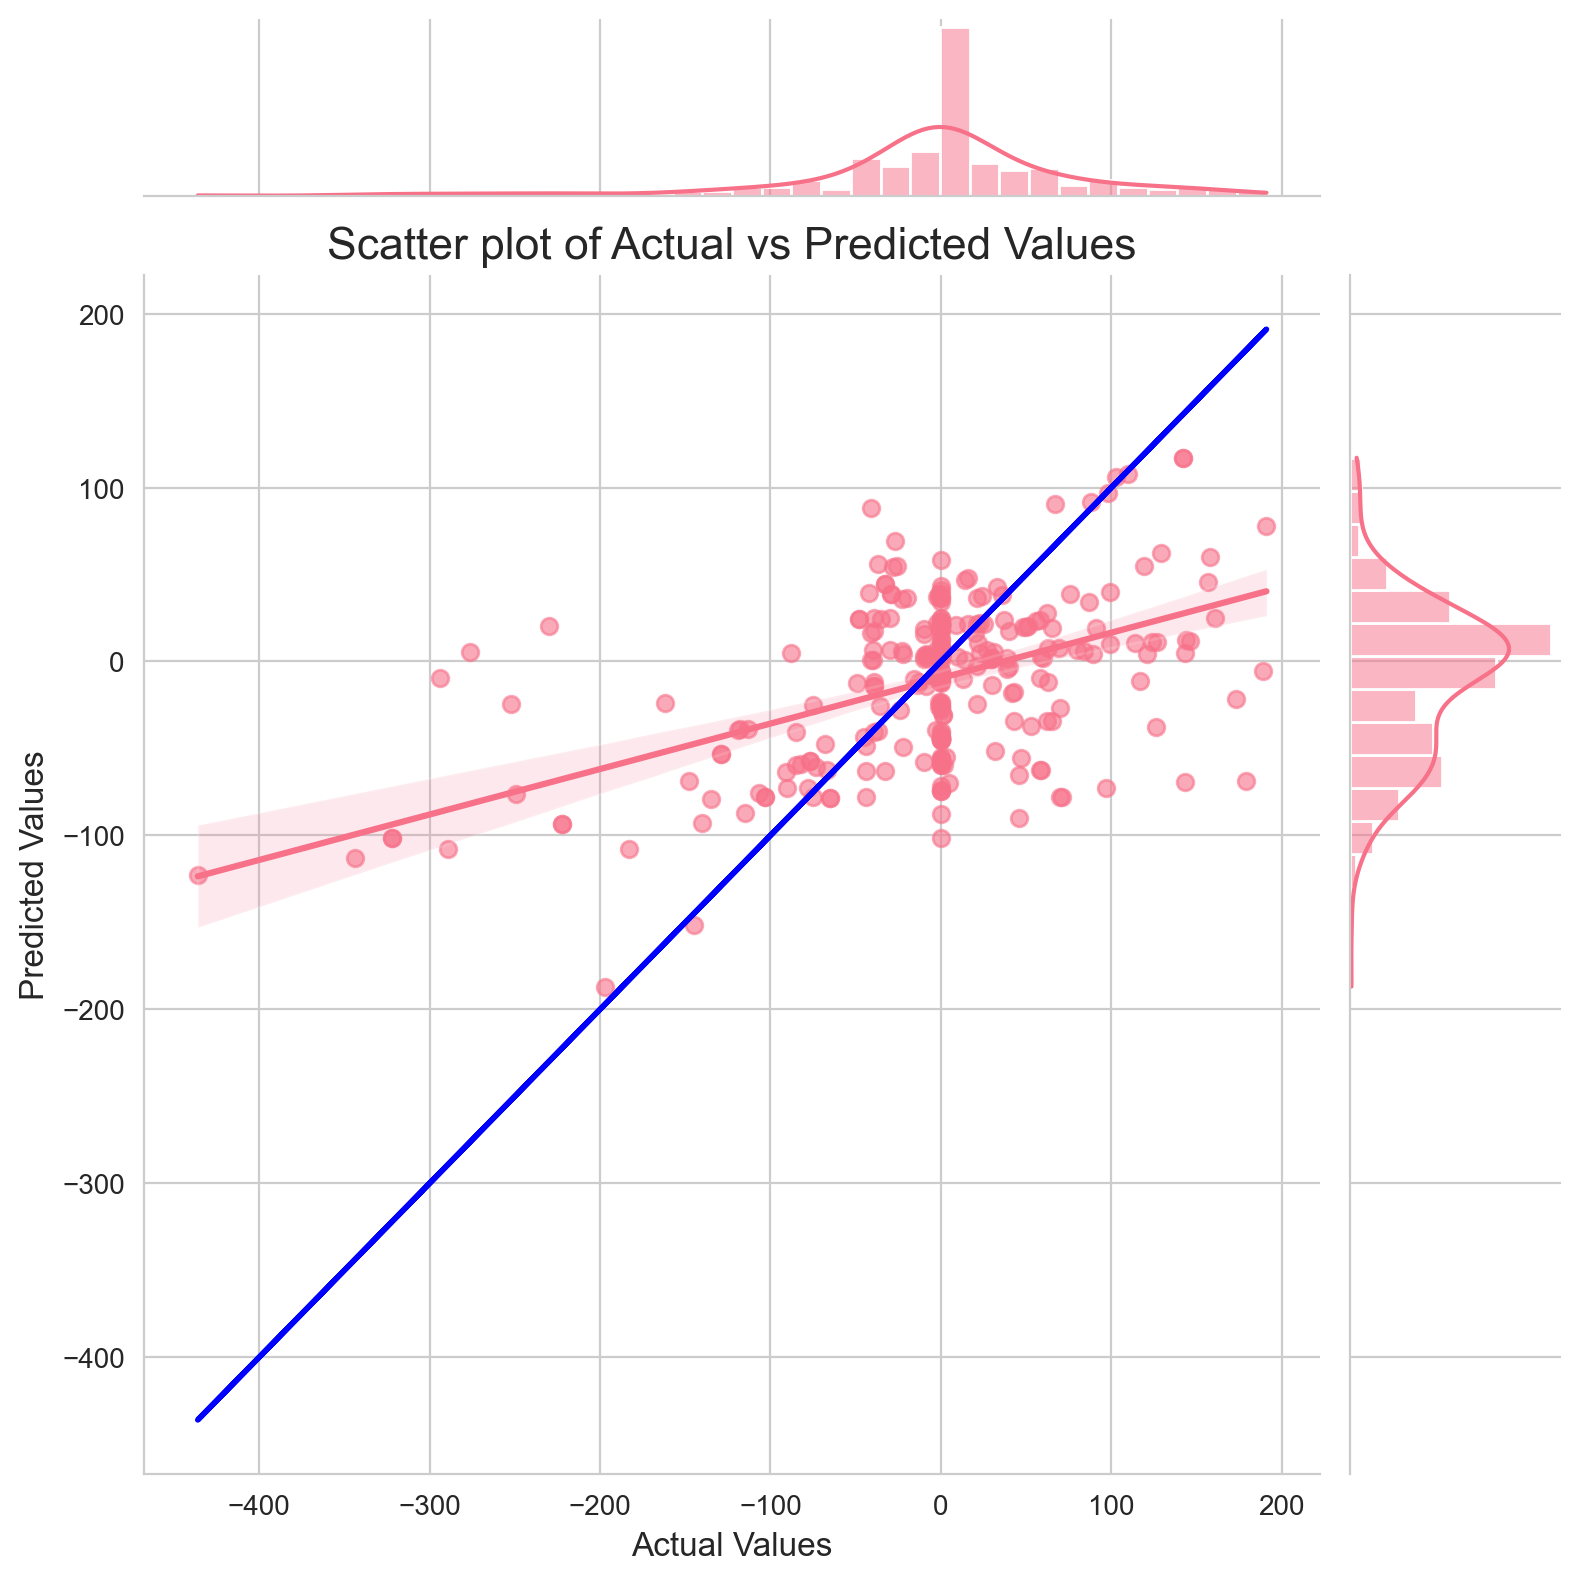

In [77]:

# Plotting the distribution of predicted values versus actual values

plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


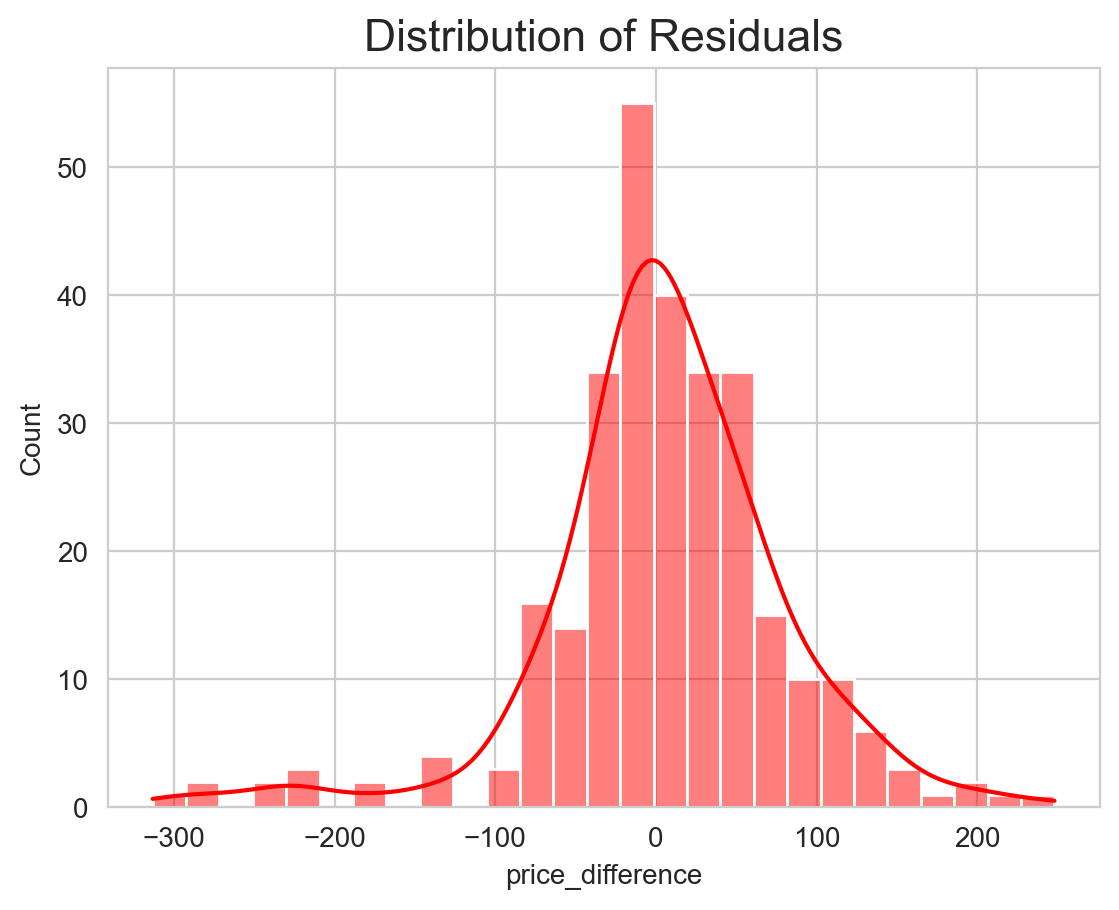

In [78]:
# (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [79]:
## SVR 

In [80]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Defining an SVR model

svr_model = SVR(kernel='rbf', C=1.0)

# Training the model on the training set

svr_model.fit(x_train, y_train)


print("SVR Regressor")
print('__________________________________________________________')
print(f'SVR Regressor score on training data: {svr_model.score(x_train, y_train)}')


SVR Regressor
__________________________________________________________
SVR Regressor score on training data: -0.0010480782533144328


In [81]:
# Predicting data on the training set and the testing set


y_pred_train = svr_model.predict(x_train)
y_pred_test = svr_model.predict(x_test)


In [82]:
# Calculating error metrics

mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
r2_svr_model = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)


print("Scores of the SVR Regressor on price:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2 Score: ", r2_svr_model)


Scores of the SVR Regressor on price:
MSE:  7376.976087077255
RMSE:  85.88932463977847
MAE:  51.23421483242195
R2 Score:  -0.0004733034167148098


<Figure size 500x500 with 0 Axes>

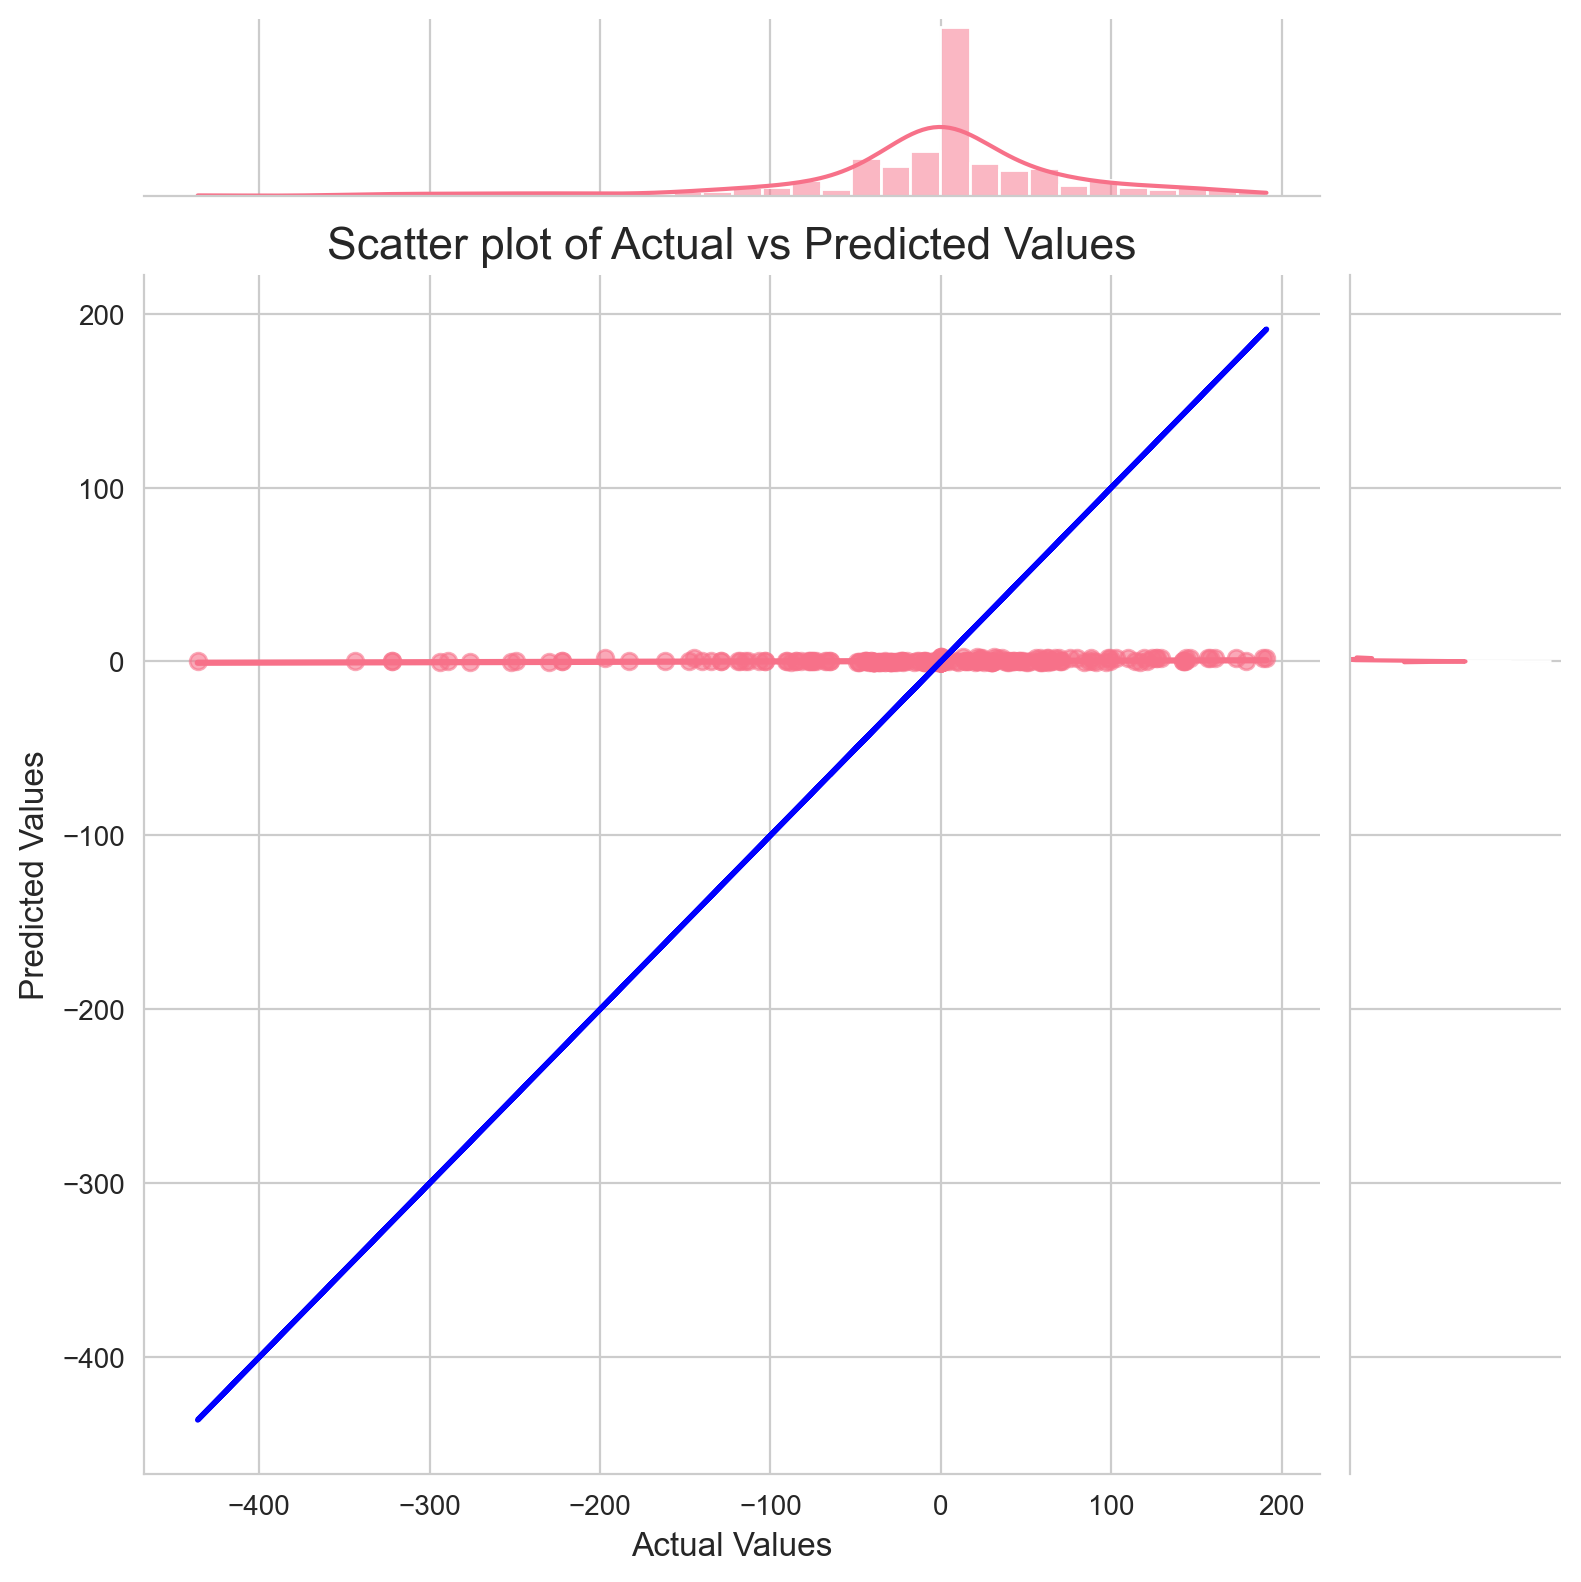

In [83]:
# Plotting the distribution of predicted values versus actual values

plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()


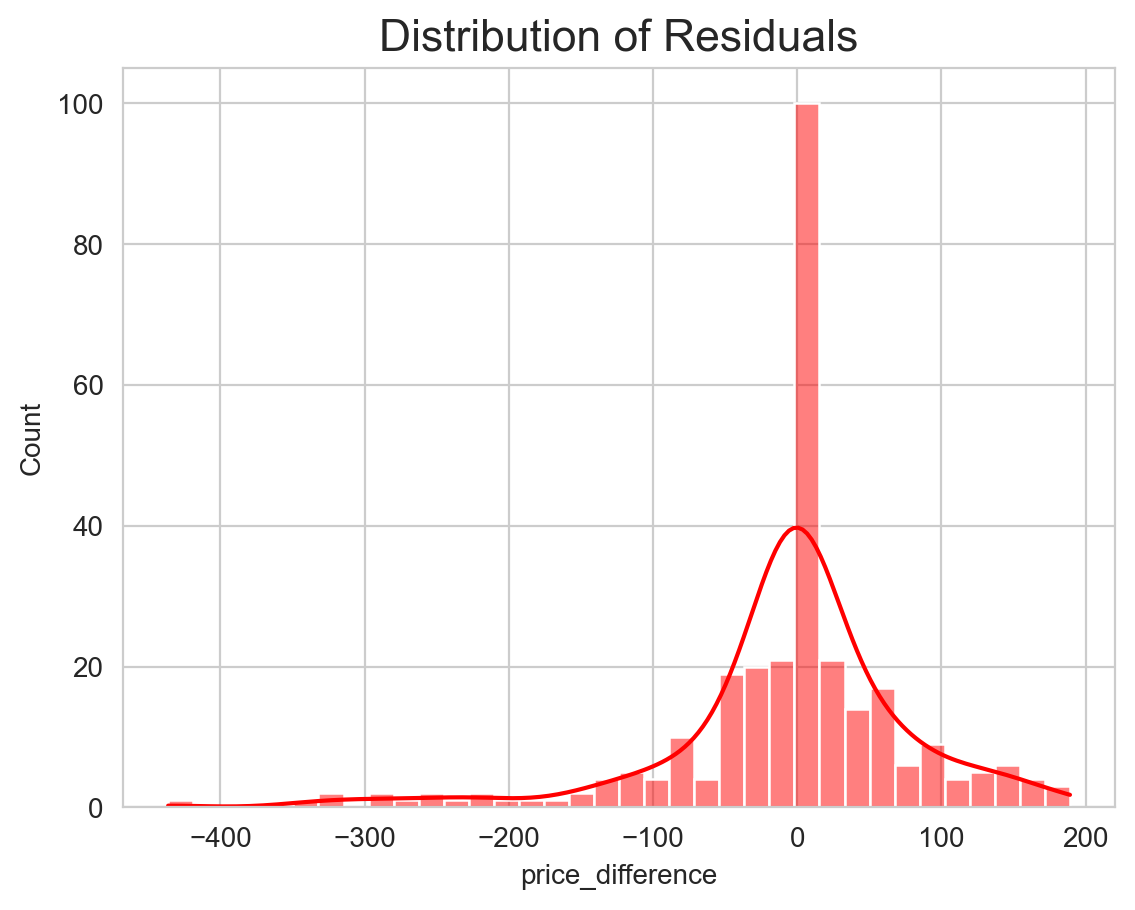

In [84]:

# (Residuals)
resid = y_test - y_pred_test
sns.histplot(resid, kde=True, color='red')
plt.title("Distribution of Residuals", fontsize=16)
plt.show()

In [85]:
# Conclusions:
# Model Accuracy: The results indicate that the SVR model is not suitable at all for the current data. The errors are very high, and the negative R^2 Score suggests that the model performs worse than the baseline model.
# Prediction Errors: The high RMSE and MAE indicate that the model makes significant errors in predictions.
# Trying Other Models: Since SVR does not provide good results, it would be advisable to try other models.


In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=42)

In [88]:
#  Gradient Boosting Regressor
gp_model = GradientBoostingRegressor(
    alpha=0.95,
    learning_rate=0.1,
    loss='squared_error',  # שונה מ-'ls' ל-'squared_error' בהתאם לגרסה העדכנית של scikit-learn
    max_depth=9,
    max_features=0.45,
    min_samples_leaf=16,
    min_samples_split=6,
    n_estimators=100,
    subsample=1.0
)

# Training the model on the training set

gp_model.fit(x_train, y_train)


# Displaying the model's score on the training set

print("Gradient Boosting Regressor")
print('__________________________________________________________')
print(f'Gradient Boosting Regressor score on training data: {gp_model.score(x_train, y_train)}')


Gradient Boosting Regressor
__________________________________________________________
Gradient Boosting Regressor score on training data: 0.8949328447810614


In [89]:
gp_model.score(x_train, y_train)

0.8949328447810614

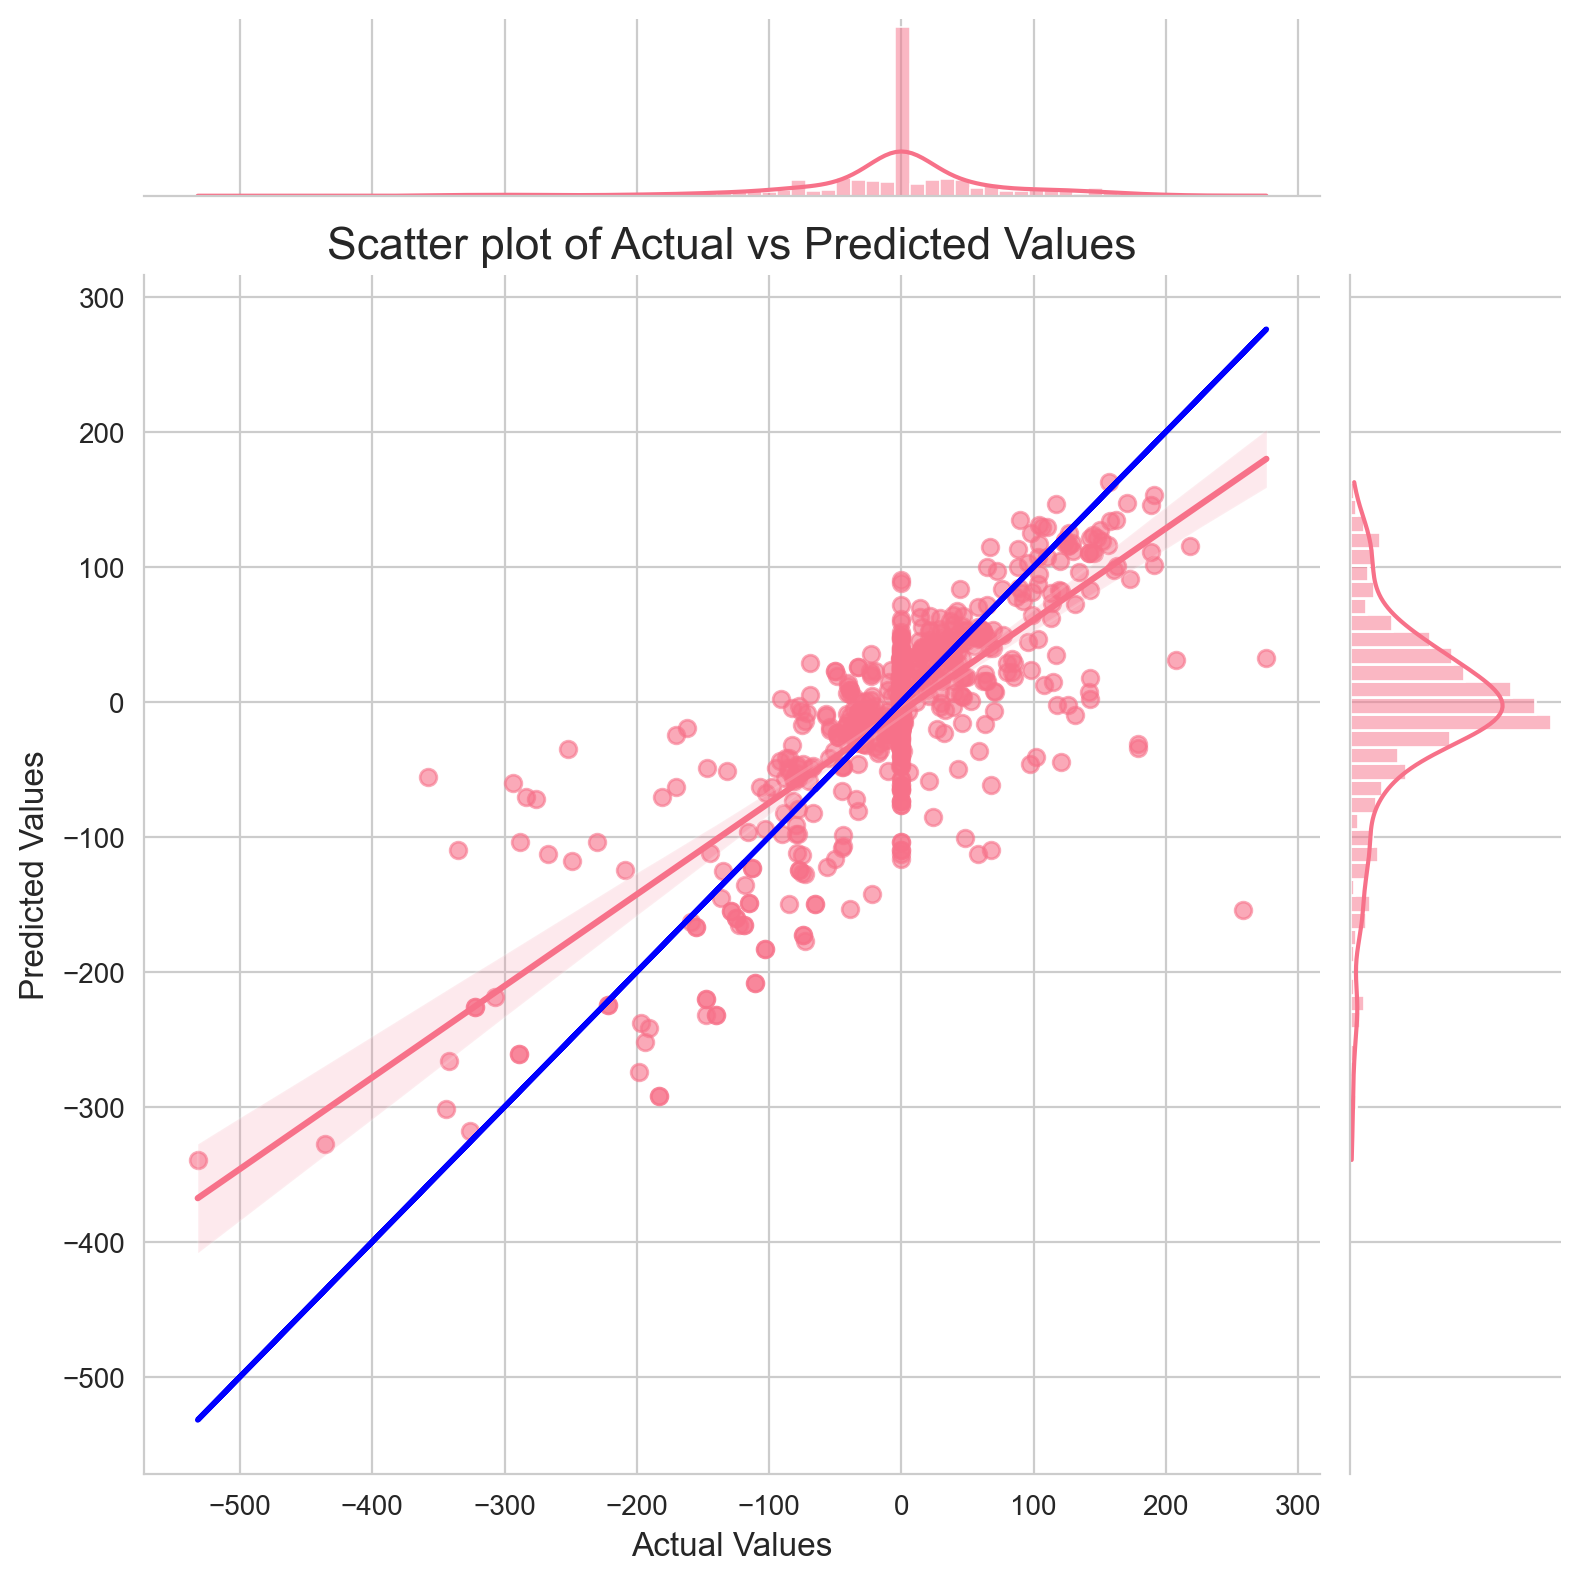

In [90]:
y_pred_train = gp_model.predict(x_train)
y_pred_test = gp_model.predict(x_test)

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.jointplot(x=y_test, y=y_pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
plt.plot(y_test, y_test, linewidth=2, color="blue")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Scatter plot of Actual vs Predicted Values", fontsize=16)
plt.tight_layout()
plt.show()

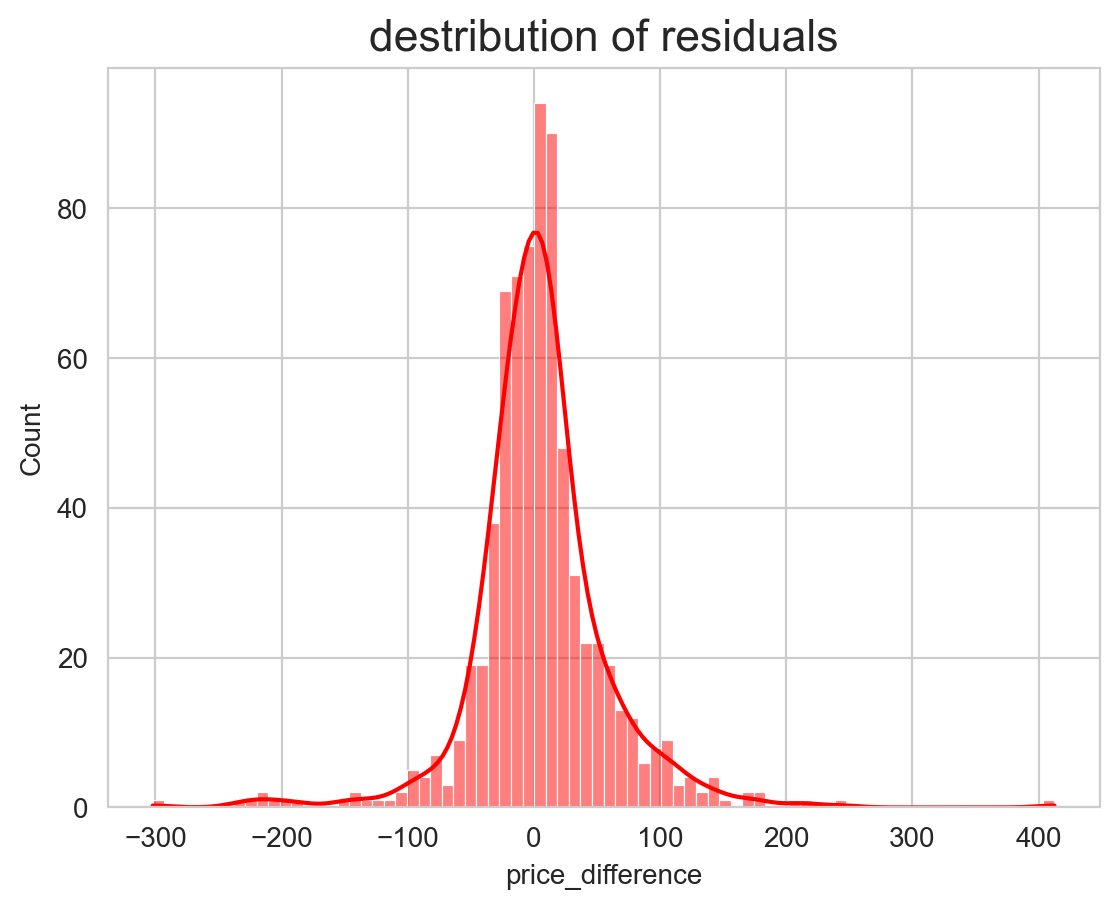

In [91]:
resid = y_test - y_pred_test
sns.histplot(resid,kde=True,color='red')
plt.title("destribution of residuals", fontsize=16)
plt.show()

In [92]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = mse**0.5
r2_gp_score = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
print("the scores of the gardient boosting on price: ")
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", r2_gp_score)

the scores of the gardient boosting on price: 
mse:  2927.6753962474827
rmse:  54.10799752575845
mae:  34.55942510443138
r2_score:  0.5975665865449481


In [93]:
### Conclusions from this part:
# Due to the significant amount of data removed from both databases, we still have certain features that help us predict the price for each, 
# even when dealing with the same hotels with the same name, and even though we entered the exact same dates for the same period.
# The prediction based on different websites isn't significantly affected.
# For future travelers, we've learned that it might be better to book a hotel through Booking, 
# as the prices there are generally lower than those on Expedia.
